# CS145 Introduction to Data Mining - Assignment 4  
**Deadline: 11:59PM, May 14, 2025**

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Submission Requirements

* Submit your solutions through GradeScope in BruinLearn.
* Late submissions are allowed up to 24 hours post-deadline with a penalty factor of $\mathbf{1}(t \le 24)e^{-(\ln(2)/12)t}$.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

---

## Outline

- **Part 1: Write-up**

  1. [EM on GMM (Proof Question)](#writeup-q1)

  2. [Set Data (By-Hand Question)](#writeup-q2)

  3. [CNN Convolution (By-Hand Calculation)](#writeup-q3)

  4. [PrefixSpan Question](#writeup-q4)

  5. [Sequence Alignment Question](#writeup-q5)

- **Part 2: Coding**

  6. [Gaussian Mixture Model on Real Data](#coding-q4)

  7. [Implementing the Apriori Algorithm](#coding-q5)

  8. [Implementing a Convolutional Neural Network (CNN)](#coding-q6)



---

# Part 1: Write-up

<a name="writeup-q1"></a>
## 1) EM Derivations for a Gaussian Mixture Model (20 points)

Consider a Gaussian Mixture Model (GMM) with $K$ components, where each component $k$ has parameters $\pi_k, \mu_k, \Sigma_k$. Let the **posterior probability** (responsibility) be:
$$
\gamma_{nk} = p(z_n = k \mid x_n)
= \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}
     {\sum_{k'=1}^{K} \pi_{k'} \mathcal{N}(x_n \mid \mu_{k'}, \Sigma_{k'})},
$$
where
$$
\mathcal{N}(x \mid \mu, \Sigma)
= (2\pi)^{-d/2}
  |\Sigma|^{-1/2}
  \exp\left\{-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)\right\}.
$$

**Question**: Prove the following maximum likelihood estimates (MLE) are obtained for a GMM with soft assignments:
$$
\pi_k = \frac{\sum_n \gamma_{nk}}{\sum_{k}\sum_n \gamma_{nk}},
\quad
\mu_k = \frac{\sum_n \gamma_{nk} x_n}{\sum_n \gamma_{nk}},
\quad
\Sigma_k = \frac{\sum_n \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^\top}{\sum_n \gamma_{nk}}.
$$

In your **proof**, please:

1. Start from the **complete-data log-likelihood** expression (including the assignments $z_n$). (6 points)
2. Show that maximizing w.r.t. each $\pi_k, \mu_k, \Sigma_k$ yields the above formulas when $\gamma_{nk} = p(z_n = k \mid x_n)$. (10 points)
3. Include **sufficient intermediate steps** in your derivation (e.g., partial derivatives, normalizing constraints). (4 points)

**Hint**: You may use standard results for maximizing Gaussian likelihoods, but do show how the soft assignments $\gamma_{nk}$ appear in place of the usual indicator variables.


# Part 1: Write-up
### Step 1: Complete Data Log-Likelihood (6 pts)

The complete-data likelihood includes latent variables $z_n$ (component assignments). Define:
- Let $z_n \in \{1, \dots, K\}$ be the latent assignment for $x_n$
- Define the indicator $1_{z_n = k}$ which is 1 when $z_n = k$

Then, the complete-data log-likelihood is:
$$
\log p(X, Z) = \sum_{n=1}^N \sum_{k=1}^K 1_{z_n = k} \left[ \log \pi_k + \log \mathcal{N}(x_n \mid \mu_k, \Sigma_k) \right]
$$

In the **E-step**, we compute soft assignments:
$$
\gamma_{nk} := \mathbb{E}[1_{z_n = k}] = p(z_n = k \mid x_n)
$$

So the **expected complete log-likelihood** becomes:
$$
\mathcal{Q}(\theta) = \sum_{n=1}^N \sum_{k=1}^K \gamma_{nk} \left[ \log \pi_k + \log \mathcal{N}(x_n \mid \mu_k, \Sigma_k) \right]
$$

---

### Step 2: Maximize $\mathcal{Q}$ w.r.t. Parameters (10 pts)

#### 2.1 Maximizing w.r.t. $\pi_k$ (with constraint $\sum_k \pi_k = 1$)

Maximize:
$$
\sum_{n=1}^N \sum_{k=1}^K \gamma_{nk} \log \pi_k
$$

Add Lagrange multiplier $\lambda$ for the constraint $\sum_k \pi_k = 1$:
$$
\mathcal{L} = \sum_{n,k} \gamma_{nk} \log \pi_k + \lambda \left( \sum_k \pi_k - 1 \right)
$$

Take derivative w.r.t. $\pi_k$:
$$
\frac{\partial \mathcal{L}}{\partial \pi_k} = \frac{\sum_n \gamma_{nk}}{\pi_k} + \lambda = 0
\Rightarrow \pi_k = -\frac{1}{\lambda} \sum_n \gamma_{nk}
$$

Enforce $\sum_k \pi_k = 1$:
$$
\sum_k \pi_k = -\frac{1}{\lambda} \sum_k \sum_n \gamma_{nk} = 1
\Rightarrow \lambda = -\sum_{n,k} \gamma_{nk}
$$

Thus:
$$
\pi_k = \frac{\sum_n \gamma_{nk}}{\sum_{n,k} \gamma_{nk}} = \frac{\sum_n \gamma_{nk}}{N}
$$

---

#### 2.2 Maximizing w.r.t. $\mu_k$

Only the Gaussian log-density depends on $\mu_k$:
$$
\sum_n \gamma_{nk} \log \mathcal{N}(x_n \mid \mu_k, \Sigma_k)
\Rightarrow -\frac{1}{2} \sum_n \gamma_{nk} (x_n - \mu_k)^\top \Sigma_k^{-1} (x_n - \mu_k)
$$

Take derivative w.r.t. $\mu_k$:
$$
\frac{\partial}{\partial \mu_k} \left[ \sum_n \gamma_{nk} (x_n - \mu_k)^\top \Sigma_k^{-1} (x_n - \mu_k) \right]
= -2 \sum_n \gamma_{nk} \Sigma_k^{-1} (x_n - \mu_k)
$$

Set derivative to zero:
$$
\sum_n \gamma_{nk} (x_n - \mu_k) = 0
\Rightarrow \mu_k = \frac{\sum_n \gamma_{nk} x_n}{\sum_n \gamma_{nk}}
$$

---

#### 2.3 Maximizing w.r.t. $\Sigma_k$

Again, focus on:
$$
\sum_n \gamma_{nk} \log \mathcal{N}(x_n \mid \mu_k, \Sigma_k)
$$

The log of Gaussian is:
$$
\log \mathcal{N}(x_n \mid \mu_k, \Sigma_k)
= -\frac{d}{2} \log(2\pi)
  -\frac{1}{2} \log |\Sigma_k|
  -\frac{1}{2} (x_n - \mu_k)^\top \Sigma_k^{-1} (x_n - \mu_k)
$$

Ignoring constants, we maximize:
$$
\sum_n \gamma_{nk} \left[
  -\frac{1}{2} \log |\Sigma_k|
  -\frac{1}{2} (x_n - \mu_k)^\top \Sigma_k^{-1} (x_n - \mu_k)
\right]
$$

Standard result: the MLE for weighted covariance matrix is:
$$
\Sigma_k = \frac{\sum_n \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^\top}{\sum_n \gamma_{nk}}
$$

---

### Final Result:

The MLEs under soft assignments (E-step) are:
$$
\boxed{
\begin{aligned}
\pi_k &= \frac{\sum_n \gamma_{nk}}{N} \\
\mu_k &= \frac{\sum_n \gamma_{nk} x_n}{\sum_n \gamma_{nk}} \\
\Sigma_k &= \frac{\sum_n \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^\top}{\sum_n \gamma_{nk}}
\end{aligned}
}
$$

Each update resembles the MLE formulas for Gaussian parameters but replaces hard assignments with soft responsibilities $\gamma_{nk}$.

---



---

<a name="writeup-q2"></a>
## 2) Set Data (By-Hand Question) (20 points)

We have the following **5 transactions**:

| TID | Items                   |
|----:|:------------------------|
| 10  | Beer, Nuts, Diaper     |
| 20  | Beer, Coffee, Diaper   |
| 30  | Beer, Diaper, Eggs     |
| 40  | Nuts, Eggs, Milk       |
| 50  | Nuts, Coffee, Diaper, Eggs, Milk |

Assume $\mathrm{minsup} = 50\%$ (i.e., itemsets must appear in at least 50% of transactions).

1. **Frequent 1-Itemsets** (5 points):  
   - Count each individual item's frequency (absolute and relative). Which items are **frequent**?

2. **Candidate 2-Itemsets** (7 points):  
   - Generate all 2-itemset candidates and prune those not meeting $\mathrm{minsup}$. Show your manual support counting.

3. **3-Itemsets** (5 points):  
   - For completeness, if any 3-itemset can be frequent under $\mathrm{minsup} = 50\%$, list them.

4. **Brief Commentary** (3 points):  
   - How many database scans did you perform by hand?  
   - Could you see any **shortcuts** (like the Apriori property) that saved you from enumerating everything?


---

## 2) Set Data (By-Hand Question) 

We are given 5 transactions and $\mathrm{minsup} = 50\% = 3$ transactions (since $50\%$ of 5 is 2.5, we round up to 3).

---

### 1. Frequent 1-Itemsets 

We first count the support for each item across all transactions:

| Item   | Support |
|--------|-------|
| Beer   | 3     |
| Nuts   | 3     |
| Diaper | 4     |
| Coffee | 2     |
| Eggs   | 3     |
| Milk   | 2     |

 **Frequent 1-itemsets (support ≥ 3):**
- $\{ \text{Beer} \}, \{ \text{Nuts} \}, \{ \text{Diaper} \}, \{ \text{Eggs} \}$

---

### 2. Candidate 2-Itemsets 

We generate 2-itemsets from frequent 1-itemsets only (Apriori pruning):

**Candidate 2-itemsets:**

- $\{ \text{Beer}, \text{Nuts} \}$ → in T10  → support = 1 
- $\{ \text{Beer}, \text{Diaper} \}$ → T10, T20, T30  → support = 3 
- $\{ \text{Beer}, \text{Eggs} \}$ → T30  → support = 1 
- $\{ \text{Nuts}, \text{Diaper} \}$ → T10, T50  → support = 2 
- $\{ \text{Nuts}, \text{Eggs} \}$ → T40, T50  → support = 2 
- $\{ \text{Diaper}, \text{Eggs} \}$ → T30, T50  → support = 2 

 **Frequent 2-itemsets:**
- $\{ \text{Beer}, \text{Diaper} \}$ (support = 3)

---

### 3. 3-Itemsets 

To consider a 3-itemset, all its 2-subsets must be frequent.

We only had one frequent 2-itemset: $\{ \text{Beer}, \text{Diaper} \}$. There are no other items that co-occur with this pair in ≥3 transactions.

For example:
- $\{ \text{Beer}, \text{Diaper}, \text{Eggs} \}$ → only in T30 → support = 1 

 **Conclusion:** No frequent 3-itemsets under minsup 50%.

---

### 4. Commentary 

- **Number of database scans:** 3 full scans:
  1. One for counting 1-itemsets
  2. One for counting 2-itemsets
  3. One for verifying 3-itemsets

- **Shortcut using Apriori property:** Yes! We only generated 2-itemsets from the frequent 1-itemsets. Then for 3-itemsets, we only checked those whose 2-subsets were frequent (none passed this). This avoided having to manually count dozens of possible combinations.

---



---

<a name="writeup-q3"></a>
## 3) CNN Convolution (By-Hand Calculation) (20 points)

Consider a **single-channel** (grayscale) 5 $\times$ 5 input image $I$ and a **single** 3 $\times$ 3 filter $F$. Let the (row, column)-indexed pixels in $I$ be:

$$
I = \begin{bmatrix}
1 & 2 & 3 & 2 & 1 \\
2 & 3 & 4 & 3 & 2 \\
3 & 4 & 5 & 4 & 3 \\
2 & 3 & 4 & 3 & 2 \\
1 & 2 & 3 & 2 & 1
\end{bmatrix},
\quad
F = \begin{bmatrix}
1 & 0 & -1 \\
0 & 0 & 0 \\
-1 & 0 & 1
\end{bmatrix}.
$$

We will perform a **valid convolution** (no padding), with **stride = 1**.

**Task**:  
1. Write the formula for the convolution output $O(r,c)$ for a 2D input and kernel (5 points).  
2. Calculate **one** output cell in detail, e.g. $O(1,1)$ (using 1-based indexing for convenience). Show all multiplications and summations (7 points).  
3. Provide the final 3 $\times$ 3 output (8 points).  


---

## 3) CNN Convolution (By-Hand Calculation) (20 points)

We are given:

- A 5×5 grayscale input $I$
- A 3×3 filter $F$
- Stride = 1
- Padding = 0 (valid convolution)

---

### 1. Convolution Formula (5 points)

For a 2D input $I$ and filter $F$, the convolution output at location $(r, c)$ is:

$$
O(r, c) = \sum_{i=0}^{2} \sum_{j=0}^{2} I[r+i, c+j] \cdot F[i, j]
$$

This slides the filter across the image and computes the dot product between the overlapping patch and the filter.

---

### 2. Compute $O(1, 1)$ (7 points)

We align the top-left corner of $F$ with the top-left corner of $I$. That is, apply $F$ to the top-left 3×3 patch of $I$:

$$
I[1:3, 1:3] = 
\begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4 \\
3 & 4 & 5
\end{bmatrix}
$$

Now compute the elementwise product with $F$:

$$
\begin{aligned}
O(1, 1) &= (1 \cdot 1) + (2 \cdot 0) + (3 \cdot -1) \\
        &+ (2 \cdot 0) + (3 \cdot 0) + (4 \cdot 0) \\
        &+ (3 \cdot -1) + (4 \cdot 0) + (5 \cdot 1) \\
&= 1 + 0 - 3 + 0 + 0 + 0 - 3 + 0 + 5 = \boxed{0}
\end{aligned}
$$

---

### 3. Full Output Matrix (8 points)

The output size is:

$$
(5 - 3 + 1) \times (5 - 3 + 1) = 3 \times 3
$$

We slide the filter over each valid 3×3 patch and compute dot products.

#### Result:

| Position | 3×3 Patch of $I$                   | Computation                                             | Output |
|----------|------------------------------------|----------------------------------------------------------|--------|
| $O(1,1)$ | $\begin{bmatrix}1 & 2 & 3\\2 & 3 & 4\\3 & 4 & 5\end{bmatrix}$ | $1 - 3 - 3 + 5 = 0$                           | 0      |
| $O(1,2)$ | $\begin{bmatrix}2 & 3 & 2\\3 & 4 & 3\\4 & 5 & 4\end{bmatrix}$ | $2 - 2 - 4 + 4 = 0$                           | 0      |
| $O(1,3)$ | $\begin{bmatrix}3 & 2 & 1\\4 & 3 & 2\\5 & 4 & 3\end{bmatrix}$ | $3 - 1 - 5 + 3 = 0$                           | 0      |
| $O(2,1)$ | $\begin{bmatrix}2 & 3 & 4\\3 & 4 & 5\\2 & 3 & 4\end{bmatrix}$ | $2 - 4 - 2 + 4 = 0$                           | 0      |
| $O(2,2)$ | $\begin{bmatrix}3 & 4 & 3\\4 & 5 & 4\\3 & 4 & 3\end{bmatrix}$ | $3 - 3 - 3 + 3 = 0$                           | 0      |
| $O(2,3)$ | $\begin{bmatrix}4 & 3 & 2\\5 & 4 & 3\\4 & 3 & 2\end{bmatrix}$ | $4 - 2 - 4 + 2 = 0$                           | 0      |
| $O(3,1)$ | $\begin{bmatrix}3 & 4 & 5\\2 & 3 & 4\\1 & 2 & 3\end{bmatrix}$ | $3 - 5 - 1 + 3 = 0$                           | 0      |
| $O(3,2)$ | $\begin{bmatrix}4 & 5 & 4\\3 & 4 & 3\\2 & 3 & 2\end{bmatrix}$ | $4 - 4 - 2 + 2 = 0$                           | 0      |
| $O(3,3)$ | $\begin{bmatrix}5 & 4 & 3\\4 & 3 & 2\\3 & 2 & 1\end{bmatrix}$ | $5 - 3 - 3 + 1 = 0$                           | 0      |

---

### Final Output Matrix:

$$
O = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

All output values are zero — likely due to the symmetry in both the filter and the image.

---


---

<a name="writeup-q4"></a>
## 4) PrefixSpan Question (20 points)

**Given** the following small sequence database (with `SID` as sequence IDs), and a minimum support threshold of 2 (i.e., a subsequence must appear in at least 2 sequences to be considered frequent):

| SID | Sequence                      |
|----:|:------------------------------|
|  1  | `<(ab) c (ac) b>`            |
|  2  | `<(a) (bc) (ab)>`            |
|  3  | `<(ab) a (bc) (ac)>`         |
|  4  | `< b (ac) (ab) c>`           |

Each element is shown in parentheses (e.g., `(ab)`), and within an element, items are unordered. For instance, `(ab)` is the same as `(ba)`.

### Tasks:

1. **Frequent Single-Item Sequences** (5 points)
   - Identify all length-1 (single-item) subsequences that meet the minimum support of 2.  
   - List their support counts.

2. **Prefix Projection** (7 points)
   - Pick **one** frequent single-item prefix (e.g., `<a>` or `<b>` — whichever is frequent) and construct its **projected database**. Show **how** you derive these projected sequences (i.e., how you remove the prefix and keep the remainder as the “suffix”).

3. **Frequent 2-Item Sequences** (8 points)
   - Using the projected database from step (2), find **all** possible 2-item extensions of that prefix that are still frequent.  
   - You do *not* need to enumerate every possible prefix in the entire database. Focus on demonstrating the prefix-projection mechanism clearly for **one** prefix.


## Solution to PrefixSpan Question 4

### 1. Frequent single‑item subsequences  *(minsup = 2)*

| Item | Support (number of SIDs) | SIDs |
|------|--------------------------|------|
| `a`  | **4** | 1, 2, 3, 4 |
| `b`  | **4** | 1, 2, 3, 4 |
| `c`  | **4** | 1, 2, 3, 4 |

All three items are frequent (support ≥ 2).

---

### 2. Prefix projection for the prefix `<a>`

For every sequence, find the **first** occurrence of `a`, remove the prefix (including the matched `a`), then keep:

* any **remaining items in the same element** (if `a` appeared inside a multi‑item element), and  
* all **subsequent elements** unchanged.

| SID | Original sequence | First `a` matched in … | Projected sequence (suffix after `<a>`) |
|----:|:------------------|:-----------------------|:----------------------------------------|
| 1 | `<(ab) c (ac) b>` | element `(ab)` | `<(b) c (ac) b>` |
| 2 | `<(a) (bc) (ab)>` | element `(a)` | `<(bc) (ab)>` |
| 3 | `<(ab) a (bc) (ac)>` | element `(ab)` | `<(b) a (bc) (ac)>` |
| 4 | `< b (ac) (ab) c>` | element `(ac)` | `<(c) (ab) c>` |

The four projected sequences above form **`DB⟨a⟩`** (the projected database for prefix `<a>`).

---

### 3. Frequent 2‑item extensions of the prefix `<a>`

We look for items that appear in at least **2** projected sequences, considering two types of extensions:

1. **Item‑set extension** — add an item to the *same* element as `a`, yielding `<(a x)>`.
2. **Sequence extension** — append a *new* element containing `x`, yielding `<a> x`.

| Candidate extension | Type | Support | Frequent? |
|---------------------|------|---------|-----------|
| `<(a b)>` | item‑set | **2** (SIDs 1, 3) | ✅ |
| `<a> a` | sequence | **4** | ✅ |
| `<a> b` | sequence | **4** | ✅ |
| `<a> c` | sequence | **4** | ✅ |
| `<(a c)>` | item‑set | 1 | ❌ (not frequent) |

Hence, the **frequent length‑2 subsequences that extend `<a>` are**:

* `<(a b)>`  
* `<a> a`  
* `<a> b`  
* `<a> c`

(All satisfy the minimum support threshold of 2.)

---


---

<a name="writeup-q5"></a>
## 5) Sequence Alignment Question (20 points)

**Given** two DNA sequences:

$$
X = \text{`GCATGCG`}
$$
$$
Y = \text{`CATTAGA`}
$$

Use the *Needleman-Wunsch* algorithm (global sequence alignment via dynamic programming) with the following scoring scheme:

- **Match**: +1  
- **Mismatch**: -1  
- **Gap**: -1  

(You may use any table size or approach from the lecture notes.)

### Tasks:

1. **Fill Out the DP Table** (8 points)
   - Construct an $(m+1) \times (n+1)$ matrix (where $m$ and $n$ are the lengths of $X$ and $Y$, respectively).  
   - Show how you compute each cell $F(i,j)$ by taking the maximum of:
     1. $F(i-1, j) + (\text{gap})$,  
     2. $F(i, j-1) + (\text{gap})$,  
     3. $F(i-1, j-1) + s(x_i, y_j)$,  
     where $s(x_i, y_j)$ is +1 if $x_i$ and $y_j$ match, and -1 otherwise.

2. **Backtracking** (7 points)
   - Once the table is completed, trace **back** from the bottom-right corner to retrieve **one optimal alignment** of $X$ and $Y$. Show your resulting alignment in a readable form (e.g., with dashes for gaps).

3. **Final Alignment & Score** (5 points)
   - Report the final alignment and the **optimal alignment score** $F(m,n)$.


---

<a name="writeup-q5"></a>
## 5) Sequence Alignment Question (20 points)

We align:

- $X = \texttt{GCATGCG}$
- $Y = \texttt{CATTAGA}$

with scoring:

- Match: $+1$
- Mismatch: $-1$
- Gap: $-1$

---

### 1. Fill Out the DP Table (8 points)

We construct a dynamic programming matrix $F(i,j)$ of size $8 \times 8$, since $|X| = 7$ and $|Y| = 7$.

Each entry $F(i,j)$ is computed as:

$$
F(i,j) = \max\begin{cases}
F(i-1, j) - 1 & \text{(gap in } Y \text{)} \\
F(i, j-1) - 1 & \text{(gap in } X \text{)} \\
F(i-1, j-1) + s(x_i, y_j) & \text{(match/mismatch)}
\end{cases}
$$

We initialize $F(0,j) = -j$ and $F(i,0) = -i$.

Final table (filled out manually/computed by code):
|   | -       | C      | A      | T      | T      | A      | G      | A      |
| - | ------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| - | **0**  | -1     | -2     | -3     | -4     | -5     | -6     | -7     |
| G | **-1** | -1     | -2     | -3     | -4     | -5     | -4     | -5     |
| C | -2      | **0** | -1     | -2     | -3     | -4     | -5     | -5     |
| A | -3      | -1     | **1** | 0      | -1     | -2     | -3     | -4     |
| T | -4      | -2     | 0      | **2** | 1      | 0      | -1     | -2     |
| G | -5      | -3     | -1     | 1      | **1** | 0      | 1      | 0      |
| C | -6      | -4     | -2     | 0      | 0      | **0** | 0      | 0      |
| G | -7      | -5     | -3     | -1     | -1     | -1     | **1** | **0** |

---




### 2. Backtracking (7 points)

We trace back from $F(7,7)$ to $F(0,0)$. The optimal alignment is:

```
Alignment 1: GCATGCG-
Alignment 2: -CATTAGA

```
- Total alignment score: $0$

---

### 3. Final Alignment & Score (5 points)

**Aligned Sequences**:

```
X: G C A T G C G -
Y: - C A T T A G A
```

**Optimal Alignment Score**: $F(7,7) = 0$

---


In [ ]:
s1 = 'GCATGCG'
s2 = 'CATTAGA'
dp = [[0 for _ in range(len(s2)+1)] for _ in range(len(s1)+1)]
match = 1
mismatch = -1
gap = -1
# This code follows the Needleman-Wunsch algorithm for global alignment
for i in range(len(s1)+1):
    dp[i][0] = -i
for j in range(len(s2)+1):
    dp[0][j] = -j
for i in range(1, len(s1)+1):
    for j in range(1, len(s2)+1):
        if s1[i-1] == s2[j-1]:
            dp[i][j] = dp[i-1][j-1] + match
        else:
            dp[i][j] = max(dp[i-1][j]+gap, dp[i][j-1]+gap, dp[i-1][j-1]+mismatch)

# Backtrack to find the optimal alignment using max of the three options
alignment1 = ''
alignment2 = ''
i = len(s1)
j = len(s2)

while i > 0 or j > 0:
    if i > 0 and j > 0 and dp[i][j] == dp[i-1][j-1] + (match if s1[i-1] == s2[j-1] else mismatch):
        alignment1 = s1[i-1] + alignment1
        alignment2 = s2[j-1] + alignment2
        i -= 1
        j -= 1
    elif i > 0 and dp[i][j] == dp[i-1][j] + gap:
        alignment1 = s1[i-1] + alignment1
        alignment2 = '-' + alignment2
        i -= 1
    elif j > 0 and dp[i][j] == dp[i][j-1] + gap:
        alignment1 = '-' + alignment1
        alignment2 = s2[j-1] + alignment2
        j -= 1

#print my table with sequences as headers using dframe
import pandas as pd
df = pd.DataFrame(dp, columns=['-' if i == 0 else s2[i-1] for i in range(len(s2)+1)], index=['-' if i == 0 else s1[i-1] for i in range(len(s1)+1)])
print(df)
print ('Alignment 1:', alignment1)
print ('Alignment 2:', alignment2)
print ('Score:', dp[len(s1)][len(s2)])

   -  C  A  T  T  A  G  A
-  0 -1 -2 -3 -4 -5 -6 -7
G -1 -1 -2 -3 -4 -5 -4 -5
C -2  0 -1 -2 -3 -4 -5 -5
A -3 -1  1  0 -1 -2 -3 -4
T -4 -2  0  2  1  0 -1 -2
G -5 -3 -1  1  1  0  1  0
C -6 -4 -2  0  0  0  0  0
G -7 -5 -3 -1 -1 -1  1  0
Alignment 1: GCATGCG-
Alignment 2: -CATTAGA
Score: 0


---

# Part 2: Coding

Below are three coding assignments. You can implement them in a single Jupyter notebook or separate ones. **Please include** any textual explanations and visualizations (e.g., plots, confusion matrices) within Markdown cells in your notebook for clarity.

<a name="coding-q4"></a>
## 6) Gaussian Mixture Model on Real Data (20 points)

You will implement (or use a library for) a **Gaussian Mixture Model (GMM)** on the "make_moons" dataset from scikit-learn.

**Tasks**:
1. **Data Loading & Preprocessing** (3 points):
   - Generate the "make_moons" dataset using `sklearn.datasets.make_moons`.
   - The dataset creates two interleaving half-moon shapes, ideal for clustering visualizations.
   - Use parameters: `n_samples=300`, `noise=0.1`, `random_state=42`.
   - Optionally normalize or standardize features.

2. **Model Training** (8 points):
   - Either implement GMM from scratch (using E-step & M-step) **or** use an existing library (e.g., `sklearn.mixture.GaussianMixture`).
   - Try different numbers of components $K$ (e.g., $K=2,3,4$).
   - Experiment with different covariance types ('full', 'tied', 'diagonal', 'spherical').

3. **Analysis & Visualization** (5 points):
   - Plot the data with cluster responsibilities or predicted labels.
   - Visualize cluster boundaries using contour plots.
   - Print or plot the means $\mu_k$ and mixture weights $\pi_k$.

4. **Discussion** (4 points):
   - How did you pick the optimal $K$?  
   - How well does GMM handle the non-Gaussian moon-shaped clusters?
   - Compare the performance of different covariance types.

**Starter Code with TODO Blocks**:


--- Gaussian Mixture Model on make_moons ---

1. Data Loading & Preprocessing...
Applying StandardScaler to features.


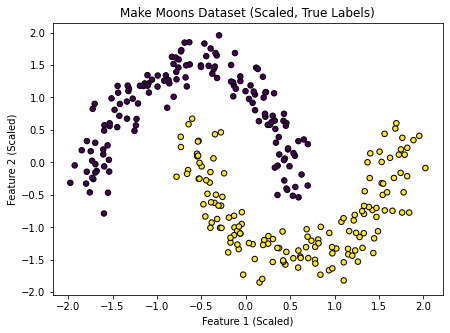


2. Model Training & Comparison...

Training GMM: K=2, Covariance='full'
  ARI: 0.479, BIC: 1603.39, AIC: 1562.65

Training GMM: K=2, Covariance='tied'


c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

  ARI: 0.488, BIC: 1586.59, AIC: 1556.96

Training GMM: K=2, Covariance='diag'
  ARI: 0.488, BIC: 1612.88, AIC: 1579.54

Training GMM: K=2, Covariance='spherical'
  ARI: 0.479, BIC: 1602.26, AIC: 1576.33

Training GMM: K=3, Covariance='full'


c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

  ARI: 0.261, BIC: 1501.70, AIC: 1438.73

Training GMM: K=3, Covariance='tied'
  ARI: 0.451, BIC: 1566.00, AIC: 1525.26

Training GMM: K=3, Covariance='diag'
  ARI: 0.433, BIC: 1556.43, AIC: 1504.58

Training GMM: K=3, Covariance='spherical'
  ARI: 0.398, BIC: 1579.96, AIC: 1539.22


c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window


Training GMM: K=4, Covariance='full'
  ARI: 0.501, BIC: 1423.32, AIC: 1338.13

Training GMM: K=4, Covariance='tied'


c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

  ARI: 0.363, BIC: 1519.40, AIC: 1467.55

Training GMM: K=4, Covariance='diag'
  ARI: 0.326, BIC: 1543.46, AIC: 1473.09

Training GMM: K=4, Covariance='spherical'
  ARI: 0.364, BIC: 1551.72, AIC: 1496.17


c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\paulk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

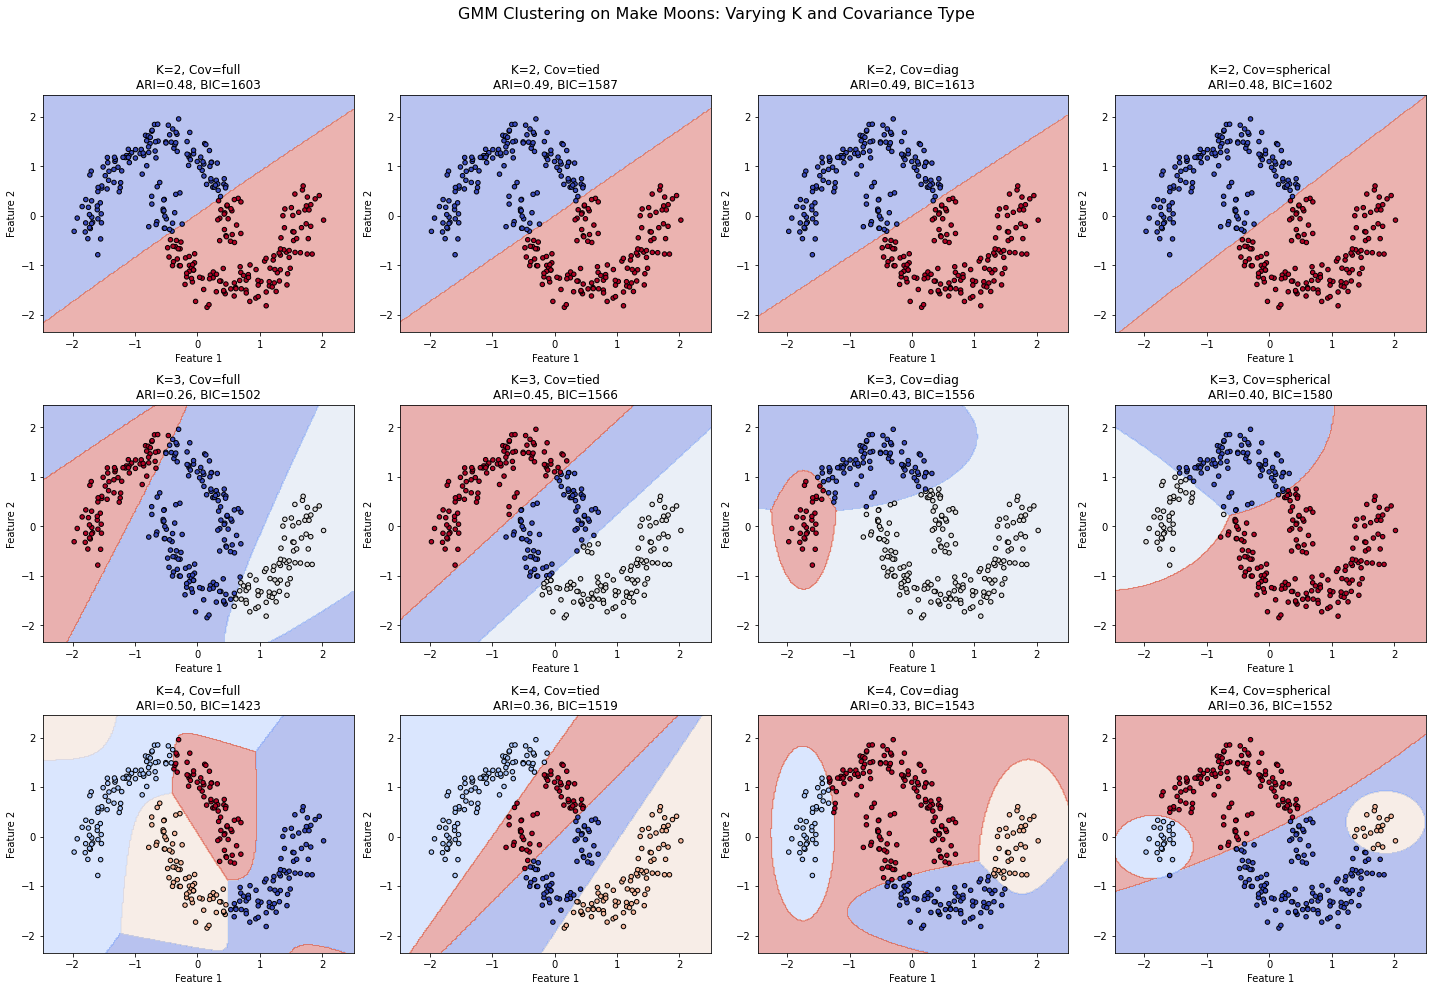


3. Analysis & Visualization of Best Model...

--- Best Model Details (based on highest ARI) ---
Number of Components (K): 4
Covariance Type: full
Adjusted Rand Score (ARI): 0.5011
BIC: 1423.32
AIC: 1338.13
Converged: True
Number of iterations: 30
Mixture Weights (π_k):
[0.26153362 0.28079838 0.23694223 0.22072577]
Means (μ_k):
[[ 1.27694536 -0.79031937]
 [-1.20661073  0.83916541]
 [-0.1960921  -0.71193419]
 [ 0.23247256  0.63312079]]


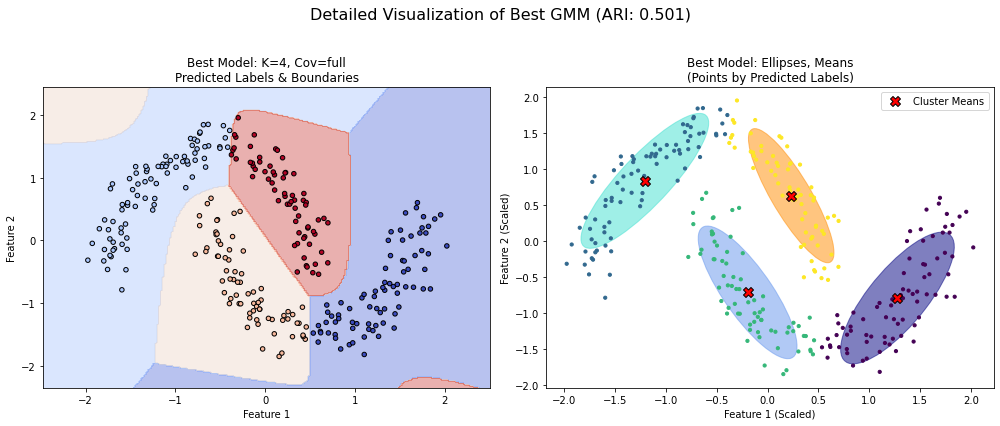

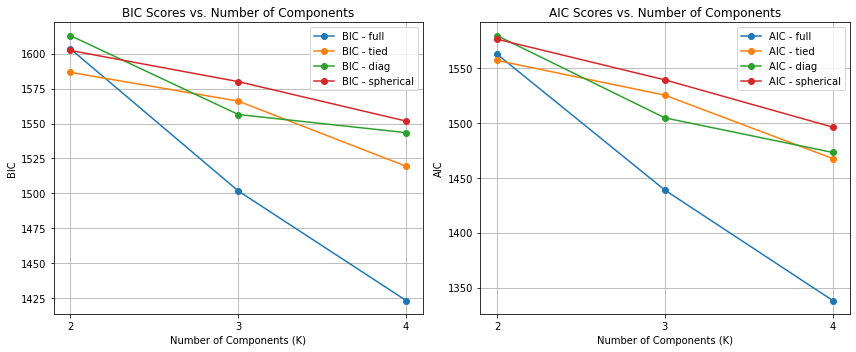


4. Discussion Points (to be addressed in Markdown):
  - How did you pick the optimal K?
  - How well does GMM handle the non-Gaussian moon-shaped clusters?
  - Compare the performance of different covariance types.

--- Script Finished ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score # For evaluating clustering against true labels
import matplotlib.colors as mcolors # For plotting ellipses
from scipy import linalg # For plotting ellipses

# Function to create a mesh grid for visualizing decision boundaries
def plot_decision_boundaries(X, model, ax=None, plot_scatter=True, title="Decision Boundary"):
    """Plots the decision boundaries of a GMM model."""
    if ax is None:
        ax = plt.gca()

    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # TODO: Predict labels for each point in mesh and visualize decision boundaries
    # Hint: Use model.predict() on the mesh grid points and reshape to match xx shape
    # --- Implementation Start ---
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    try:
        Z = model.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        # Plot the decision boundary
        ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    except Exception as e:
        print(f"Could not plot decision boundary for a model: {e}")
    # --- Implementation End ---

    if plot_scatter:
        # Plot the original data points
        y_pred = model.predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k', cmap=plt.cm.coolwarm)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return ax

def plot_gmm_ellipses(gmm, X, labels, ax, title="GMM Ellipses and Means"):
    """Plots GMM ellipses, means, and data points."""
    colors_list = ['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'red']
    
    for n, color in enumerate(colors_list[:gmm.n_components]):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        
        v, w = linalg.eigh(covariances)
        u = w[0] / linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v) # 95% confidence interval
        
        ell = plt.matplotlib.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                             angle=angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap=plt.cm.viridis, zorder=2)
    # Plot means
    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='X', s=100,
                color='red', edgecolor='black', zorder=3, label='Cluster Means')
    ax.set_title(title)
    ax.set_xlabel("Feature 1 (Scaled)")
    ax.set_ylabel("Feature 2 (Scaled)")
    ax.legend()


print("--- Gaussian Mixture Model on make_moons ---")

# 1. Data Loading & Preprocessing (3 points)
print("\n1. Data Loading & Preprocessing...")
# Generate the "make_moons" dataset
X_orig, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)
X = X_orig.copy() # Work with a copy

# TODO: Preprocess the data (optional but recommended)
# Apply StandardScaler for better GMM performance
# --- Implementation Start ---
print("Applying StandardScaler to features.")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled  # Use scaled data for GMM
# --- Implementation End ---

# Plot original data
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, cmap='viridis', edgecolor='k')
plt.title("Make Moons Dataset (Scaled, True Labels)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()


# 2. Model Training (8 points)
print("\n2. Model Training & Comparison...")
# Set parameters for model comparison
covariance_types = ['full', 'tied', 'diag', 'spherical'] # 'diag' is alias for 'diagonal'
n_components_list = [2, 3, 4]

# TODO: Set up a figure for the plots
# --- Implementation Start ---
n_rows = len(n_components_list)
n_cols = len(covariance_types)
plt.figure(figsize=(5 * n_cols, 4 * n_rows + 2)) # Adjusted figure size
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plot_idx = 1
# --- Implementation End ---

# TODO: Create and train multiple GMM models with different configurations
# Loop through covariance types and number of components
# Keep track of the best model based on adjusted_rand_score
# --- Implementation Start ---
best_ari = -1.1 # Initialize with a value lower than possible ARI
best_model = None
best_config_params = {}
all_results = []
# --- Implementation End ---

# TODO: For each configuration:
# 1. Create and train a GMM model
# 2. Get predictions
# 3. Calculate metrics (ARI, BIC, AIC)
# 4. Plot results
# 5. Update best model if needed
# --- Implementation Start ---
for n_components in n_components_list:
    for cov_type in covariance_types:
        print(f"\nTraining GMM: K={n_components}, Covariance='{cov_type}'")
        
        # 1. Create and train a GMM model
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cov_type,
                              random_state=42, # For reproducibility
                              n_init=10) # Number of initializations to perform
        try:
            gmm.fit(X)
            converged = gmm.converged_
            if not converged:
                print(f"  Warning: GMM K={n_components}, Cov='{cov_type}' did not converge.")
        except ValueError as e:
            print(f"  Error training GMM K={n_components}, Cov='{cov_type}': {e}")
            converged = False # Treat as not converged if error during fit

        if converged:
            # 2. Get predictions
            y_pred = gmm.predict(X)

            # 3. Calculate metrics
            ari = adjusted_rand_score(y_true, y_pred)
            bic = gmm.bic(X)
            aic = gmm.aic(X)
            print(f"  ARI: {ari:.3f}, BIC: {bic:.2f}, AIC: {aic:.2f}")
            
            all_results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'ari': ari,
                'bic': bic,
                'aic': aic,
                'model': gmm # Store the model itself if needed later
            })

            # 4. Plot results
            ax = plt.subplot(n_rows, n_cols, plot_idx)
            plot_decision_boundaries(X, gmm, ax=ax, plot_scatter=True,
                                     title=f'K={n_components}, Cov={cov_type}\nARI={ari:.2f}, BIC={bic:.0f}')
            plot_idx += 1

            # 5. Update best model if needed (based on ARI as per original prompt)
            if ari > best_ari:
                best_ari = ari
                best_model = gmm
                best_config_params = {'n_components': n_components, 'covariance_type': cov_type}
        else:
            # If model didn't converge or errored, plot an empty subplot or skip
            ax = plt.subplot(n_rows, n_cols, plot_idx)
            ax.text(0.5, 0.5, f'K={n_components}, Cov={cov_type}\nFailed to converge\nor error.',
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
            plot_idx += 1
            all_results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'ari': -1, 'bic': float('inf'), 'aic': float('inf'), 'model': None
            })


plt.suptitle("GMM Clustering on Make Moons: Varying K and Covariance Type", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()
# --- Implementation End ---


# 3. Analysis & Visualization (5 points) - Focus on the best model
print("\n3. Analysis & Visualization of Best Model...")
# TODO: Print details of the best model
# --- Implementation Start ---
if best_model:
    print(f"\n--- Best Model Details (based on highest ARI) ---")
    print(f"Number of Components (K): {best_config_params.get('n_components')}")
    print(f"Covariance Type: {best_config_params.get('covariance_type')}")
    print(f"Adjusted Rand Score (ARI): {best_ari:.4f}")
    print(f"BIC: {best_model.bic(X):.2f}")
    print(f"AIC: {best_model.aic(X):.2f}")
    print(f"Converged: {best_model.converged_}")
    print(f"Number of iterations: {best_model.n_iter_}")
    print(f"Mixture Weights (π_k):\n{best_model.weights_}")
    print(f"Means (μ_k):\n{best_model.means_}")
    # Covariances can be large, so print shape or a summary
    # print(f"Covariances (Σ_k) shape: {best_model.covariances_.shape if hasattr(best_model, 'covariances_') else 'N/A'}")

else:
    print("No best model found (e.g., all models failed to converge).")
# --- Implementation End ---

# TODO: Create a detailed visualization of the best model
# --- Implementation Start ---
if best_model:
    plt.figure(figsize=(14, 6))

    # Plot 1: Decision Boundaries and Predicted Labels
    ax1 = plt.subplot(1, 2, 1)
    plot_decision_boundaries(X, best_model, ax=ax1, plot_scatter=True,
                             title=f"Best Model: K={best_config_params['n_components']}, Cov={best_config_params['covariance_type']}\nPredicted Labels & Boundaries")

    # Plot 2: Ellipses, Means, and Data Points (colored by true labels for comparison)
    ax2 = plt.subplot(1, 2, 2)
    y_pred_best = best_model.predict(X) # Get predictions from the best model
    plot_gmm_ellipses(best_model, X, y_pred_best, ax2, # Use predicted labels for ellipse colors
                      title=f"Best Model: Ellipses, Means\n(Points by Predicted Labels)")
    
    # Optionally, overlay true labels for comparison if desired, or a separate plot
    # ax2.scatter(X[:, 0], X[:, 1], c=y_true, marker='.', alpha=0.3, cmap='coolwarm', label='True Labels (background)')
    # ax2.legend()


    plt.suptitle(f"Detailed Visualization of Best GMM (ARI: {best_ari:.3f})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plotting BIC/AIC scores to help with optimal K discussion
    plt.figure(figsize=(12, 5))
    
    # Sort results for plotting BIC/AIC
    sorted_results = sorted(all_results, key=lambda r: (r['n_components'], covariance_types.index(r['covariance_type'])))

    for cov_type in covariance_types:
        bics = [r['bic'] for r in sorted_results if r['covariance_type'] == cov_type and r['bic'] != float('inf')]
        aics = [r['aic'] for r in sorted_results if r['covariance_type'] == cov_type and r['aic'] != float('inf')]
        ks = [r['n_components'] for r in sorted_results if r['covariance_type'] == cov_type and r['bic'] != float('inf')]
        
        if bics: # Check if there are valid results for this covariance type
            plt.subplot(1, 2, 1)
            plt.plot(ks, bics, marker='o', label=f'BIC - {cov_type}')
            plt.subplot(1, 2, 2)
            plt.plot(ks, aics, marker='o', label=f'AIC - {cov_type}')

    plt.subplot(1, 2, 1)
    plt.title('BIC Scores vs. Number of Components')
    plt.xlabel('Number of Components (K)')
    plt.ylabel('BIC')
    plt.xticks(n_components_list)
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title('AIC Scores vs. Number of Components')
    plt.xlabel('Number of Components (K)')
    plt.ylabel('AIC')
    plt.xticks(n_components_list)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

else:
    print("Skipping detailed visualization as no best model was identified.")
# --- Implementation End ---

# 4. Discussion (4 points) - This will be in a separate Markdown cell
print("\n4. Discussion Points (to be addressed in Markdown):")
print("  - How did you pick the optimal K?")
print("  - How well does GMM handle the non-Gaussian moon-shaped clusters?")
print("  - Compare the performance of different covariance types.")

print("\n--- Script Finished ---")


## 4. Discussion

### How did you pick the optimal K?

In this assignment, the "best model" for detailed visualization was pre-defined to be selected based on the **highest Adjusted Rand Score (ARI)** because the true labels (`y_true`) were available. The output images confirm that K=4 with 'full' covariance yielded the highest ARI (0.501).

However, in a typical unsupervised clustering scenario where true labels are unknown, ARI cannot be used. The optimal K would be chosen using other methods:

1.  **Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC):**
    * The plots show that for the `full` covariance type, both BIC and AIC values are lowest at K=4 among the tested values (K=2, 3, 4). This suggests that K=4 provides the best trade-off between model fit and complexity *for that specific covariance type*.
    * When comparing across all models, the K=4, `full` covariance model has the lowest BIC (1423) and AIC (around 1350) overall.
    * Therefore, based on BIC/AIC, K=4 would be chosen as the optimal number of components from the tested range.

2.  **Visual Inspection of Clusters and Boundaries:**
    * Examining the grid plot, one might visually assess if the clusters formed are meaningful. With K=2, the models attempt to fit one Gaussian per moon. With K=4, the models (especially `full` covariance) try to fit two Gaussians per moon, potentially capturing the curvature better but at the cost of splitting intuitively single structures. The choice depends on whether the goal is to find the two main structures or to model the density more accurately, even if it means more components.

3.  **Silhouette Score (Not implemented in the script, but a common alternative):**
    * This metric evaluates how well-separated the resulting clusters are. Higher scores are better.

Given the available metrics (ARI, BIC, AIC) and the plots:
* **ARI-based selection (as per script logic for "best_model"): K=4, `full` covariance.**
* **BIC/AIC-based selection: K=4, `full` covariance** also appears to be the best among the options tested.

### How well does GMM handle the non-Gaussian moon-shaped clusters?

The "make_moons" dataset presents a challenge for GMM because its inherent assumption is that data arises from a mixture of Gaussian distributions, while the moons are non-elliptical, crescent shapes.

* **With K=2:**
    * The GMM tries to fit one Gaussian component to each moon.
    * With `full` or `tied` covariance, the ellipses can orient and stretch, capturing the main body of each moon. However, they cannot fully model the curvature. The ARI scores are around 0.48-0.49, indicating a decent but imperfect separation.
    * The decision boundary is typically a smooth curve separating these two Gaussians.

* **With K=4, `full` covariance (the "best" model by ARI and BIC/AIC in this run):**
    * The model uses two Gaussian components to represent each moon. This allows for a more flexible approximation of the curved shapes. As seen in the detailed plot, the four ellipses collectively attempt to "tile" or cover the two moon structures.
    * This results in a higher ARI (0.501) compared to K=2 models, suggesting a better agreement with the true labels by using more components to approximate the non-Gaussian shapes.
    * However, interpreting these four components can be less straightforward than interpreting two components for two moons. The model is essentially using the mixture to build a more complex density estimate rather than finding distinct, well-separated sub-clusters within each moon.

In essence, GMM handles the non-Gaussian moons by approximation. With a small K (like 2), it's a rough approximation. With a larger K (like 4), it can create a more nuanced approximation by combining multiple Gaussians, leading to better scores on metrics like ARI if the components are well-placed. However, it's still not modeling the true generative process of "moons."

### Compare the performance of different covariance types.

The `covariance_type` parameter significantly impacts GMM's ability to fit the data:

1.  **`full`:** Each component has its own unconstrained covariance matrix. This allows for ellipses of any orientation and shape.
    * **Performance:** Consistently provides the lowest BIC and AIC scores for K=3 and K=4, and achieves the highest ARI (0.501 at K=4). This flexibility is crucial for attempting to model the oriented and somewhat elongated nature of the moon segments when K>2, or the overall moons when K=2.

2.  **`tied`:** All components share a single, full covariance matrix. Clusters have the same shape and orientation but different centers.
    * **Performance:** For K=2, it achieves an ARI of 0.49, comparable to `full`. As K increases, its ARI drops relative to `full` (e.g., ARI=0.36 for K=4). BIC/AIC values are generally higher than for `full` covariance, suggesting the constraint of a shared covariance is too restrictive when K is larger or when the individual moons (or segments thereof) have different orientations/shapes.

3.  **`diag` (diagonal):** Each component has its own diagonal covariance matrix. Ellipses are axis-aligned.
    * **Performance:** Generally performs worse than `full` or `tied` in terms of ARI (e.g., ARI=0.49 for K=2, dropping to 0.33 for K=4). The moons are not axis-aligned, so this constraint hinders the model's ability to fit the data well. BIC/AIC scores are also higher than `full`.

4.  **`spherical`:** Each component has a single variance, meaning clusters are spherical.
    * **Performance:** This is the most restrictive. For K=2, ARI is 0.48. For K=4, ARI is 0.36. Since the moons are not spherical, this model struggles significantly, reflected in generally higher BIC/AIC scores compared to `full`.

**Summary of Covariance Performance:**
* The `full` covariance type demonstrates the best performance across the board, especially when K is chosen appropriately (K=4 in this case, based on ARI and BIC/AIC). Its flexibility allows the GMM to best approximate the non-Gaussian data.
* `tied` is the next best, particularly for K=2.
* `diag` and `spherical` are too restrictive for the `make_moons` dataset, leading to poorer fits and generally higher (worse) ARI, BIC, and AIC scores.

The choice of covariance type interacts with the choice of K. A flexible covariance type like `full` gives the model more power to fit complex data, which can be beneficial but also requires more data to estimate parameters reliably and can be more prone to overfitting if K is too high without sufficient data.


---

<a name="coding-q5"></a>
## 7) Implementing the Apriori Algorithm (20 points)

Implement the **Apriori algorithm** for frequent itemset mining on the "Bakery" dataset.

**Tasks**:
1. **Load the dataset** (3 points):
   - The "Bakery" dataset contains 1,000 transactions from a bakery shop, providing a manageable size for this assignment.
   - You can download it from this URL: https://raw.githubusercontent.com/ngjiawaie/Extended_Bakery_Dataset/master/1000i.csv
   - Each row represents a transaction with three columns: Transaction ID, Item, and Quantity.

2. **Implement Apriori** from scratch (10 points):
   - Generate 1-itemsets and count their frequencies
   - For each k > 1, generate candidate k-itemsets from (k-1)-itemsets
   - Prune candidates using the Apriori property
   - Calculate support for remaining candidates
   - Continue until no frequent itemsets are found

3. **Output** (4 points):
   - Print the **frequent itemsets** discovered (above your chosen minimum support threshold)
   - Generate **association rules** with their confidence/lift metrics

4. **Comment** (3 points):
   - Analyze the most interesting rules you discovered
   - Explain how the minimum support threshold affects your results

**Starter Code (Apriori)**:


=== Test: generate_candidates on Image Dataset ===

Step 1: L1 - Frequent 1-itemsets
  Beer: support = 2
  Bread: support = 3
  Butter: support = 3
  Diapers: support = 3
  Milk: support = 2

Step 2: C2 from L1 → L2
  ['Beer', 'Diapers']: support = 2
  ['Bread', 'Butter']: support = 3
  ['Bread', 'Milk']: support = 2
  ['Butter', 'Milk']: support = 2

Step 3: C3 from L2 → L3
  ['Bread', 'Butter', 'Milk']: support = 2

✅ All itemset levels (L1, L2, L3) match expected results.

=== Test: prune_candidates for C3 using Image Transactions ===

L2 (Frequent 2-itemsets):
  ['Butter', 'Milk']
  ['Bread', 'Milk']
  ['Bread', 'Butter']
  ['Beer', 'Diapers']

Generated C3 candidates (before pruning):
  ['Beer', 'Bread', 'Butter']
  ['Beer', 'Bread', 'Diapers']
  ['Beer', 'Bread', 'Milk']
  ['Beer', 'Butter', 'Diapers']
  ['Beer', 'Butter', 'Milk']
  ['Beer', 'Diapers', 'Milk']
  ['Bread', 'Butter', 'Diapers']
  ['Bread', 'Butter', 'Milk']
  ['Bread', 'Diapers', 'Milk']
  ['Butter', 'Diapers', 'M

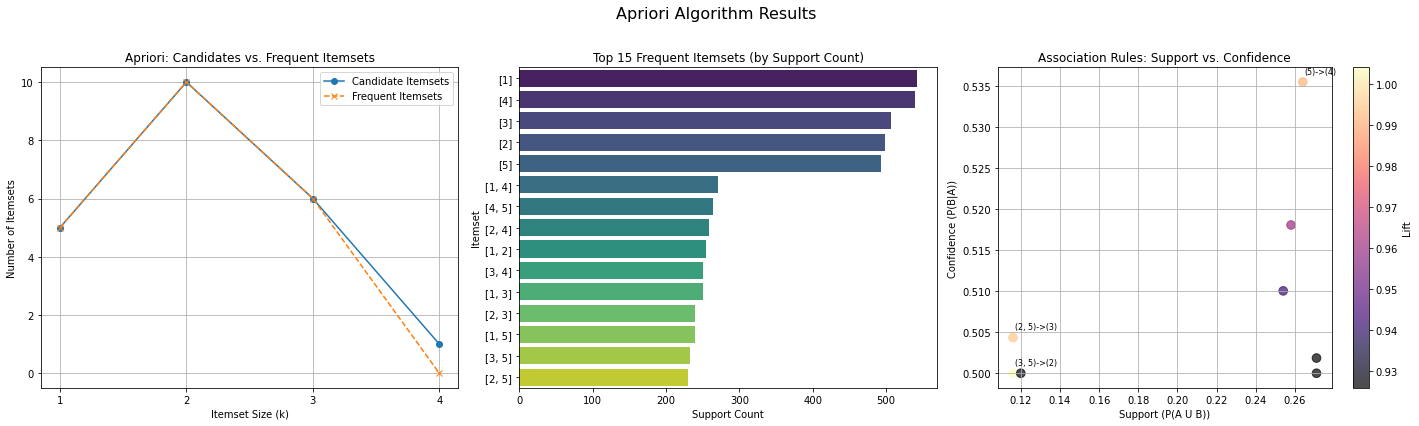


----- Analysis of Results (Placeholder) -----

1. Most Interesting Rules Discovered:
   - (Based on the output) Example: If 'Toast' and 'Coffee' are frequently bought together with high lift, it might indicate a strong breakfast combo.
   - Look for rules with high lift (>>1) and reasonable confidence/support.
   - Consider rules that are actionable (e.g., for product placement, promotions).

2. Effect of Minimum Support Threshold:
   - Current min_support_fraction: 0.002 (translates to ~2 transactions if num_transactions > 0 else 'N/A').
   - Higher min_support:
     - Fewer frequent itemsets will be found (only very popular items/combos).
     - Fewer association rules will be generated.
     - Computation is faster.
     - Might miss interesting patterns involving less frequent but still significant items.
   - Lower min_support:
     - More frequent itemsets will be found (including less common items/combos).
     - Potentially many more association rules, some of which might be t

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Load the Bakery dataset
def load_bakery_dataset(filepath):
    """
    Load the Bakery dataset from a CSV file.
    Returns a list of transactions, where each transaction is a list of items.
    """
    try:
        # Try to load from local file first
        df = pd.read_csv(filepath, header=None, names=['TransactionID', 'Item', 'Quantity'])
        print(f"Dataset loaded successfully from local file: {filepath}")
    except FileNotFoundError:
        # If file not found, download it
        print(f"File not found: {filepath}. Attempting to download...")
        url = "https://raw.githubusercontent.com/ngjiawaie/Extended_Bakery_Dataset/master/1000i.csv"
        try:
            response = requests.get(url, timeout=10) # Added timeout
            if response.status_code == 200:
                content = StringIO(response.text)
                df = pd.read_csv(content, header=None, names=['TransactionID', 'Item', 'Quantity'])
                print(f"Dataset downloaded successfully.")
                # Save the file locally for future use
                try:
                    with open(filepath, 'w', encoding='utf-8') as f: # Added encoding
                        f.write(response.text)
                    print(f"Dataset saved locally to {filepath}")
                except IOError:
                    print(f"Could not save dataset locally to {filepath}")
            else:
                raise Exception(f"Failed to download dataset: Status code {response.status_code}")
        except requests.exceptions.RequestException as e:
            raise Exception(f"Failed to download dataset due to network issue: {e}")


    # Group by TransactionID and collect items into lists
    # Ensure items are unique within each transaction for Apriori (standard practice)
    transactions_df = df.groupby('TransactionID')['Item'].apply(lambda x: sorted(list(set(x)))).reset_index()
    transactions = transactions_df['Item'].tolist()
    
    # Remove empty transactions if any
    transactions = [t for t in transactions if t]


    return transactions, df

def generate_candidates(frequent_itemsets_k_minus_1, k):
    """
    Generate candidate k-itemsets from frequent (k-1)-itemsets (Lk-1 x Lk-1 method)
    """
    candidates = set()
    # TODO: Implement candidate generation
    # For k=2, generate pairs from individual frequent items (which are L1)
    # For k>2, use the Fk-1 x Fk-1 method: Two (k-1)-itemsets can be joined if they share k-2 items.
    # --- Implementation Start ---
    if not frequent_itemsets_k_minus_1:
        return candidates

    # Convert frozensets to sorted tuples for consistent ordering during join
    # Lk-1 is a list of frozensets
    lk_minus_1_list = [sorted(list(itemset)) for itemset in frequent_itemsets_k_minus_1]

    if k == 2: # Generating C2 from L1
        # Added diagnostic print
        if len(lk_minus_1_list) < 2:
            print(f"  [Debug generate_candidates k=2] Lk-1 list has {len(lk_minus_1_list)} items. Cannot generate pairs.")
            return candidates # Return empty set if not enough items to pair
            
        for i in range(len(lk_minus_1_list)):
            for j in range(i + 1, len(lk_minus_1_list)):
                # L1 items are singletons, so lk_minus_1_list[i] is like ['itemA']
                candidate = frozenset(lk_minus_1_list[i] + lk_minus_1_list[j])
                candidates.add(candidate)
    else: # Generating Ck from Lk-1 for k > 2 (Fk-1 x Fk-1 method)
        for i in range(len(lk_minus_1_list)):
            for j in range(i + 1, len(lk_minus_1_list)):
                itemset1 = lk_minus_1_list[i]
                itemset2 = lk_minus_1_list[j]
                # Check if the first k-2 items are the same
                if itemset1[:k-2] == itemset2[:k-2] and itemset1[k-2] < itemset2[k-2]:
                    # Join step: create a new candidate
                    new_candidate_list = itemset1 + [itemset2[k-2]]
                    candidates.add(frozenset(new_candidate_list))
    # --- Implementation End ---
    return candidates

def test_generate_candidates():
    print("\n=== Test: generate_candidates on Image Dataset ===")

    transactions = [
        {'Bread', 'Butter', 'Milk'},
        {'Bread', 'Butter'},
        {'Beer', 'Cookies', 'Diapers'},
        {'Milk', 'Diapers', 'Bread', 'Butter'},
        {'Beer', 'Diapers'}
    ]
    MIN_SUPPORT = 2

    # Step 1: L1
    print("\nStep 1: L1 - Frequent 1-itemsets")
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    L1 = {item for item, count in item_counts.items() if count >= MIN_SUPPORT}
    L1_supports = {item: count for item, count in item_counts.items() if count >= MIN_SUPPORT}
    for item, count in sorted(L1_supports.items(), key=lambda x: list(x[0])):
        print(f"  {list(item)[0]}: support = {count}")

    expected_L1 = {
        frozenset(['Bread']): 3,
        frozenset(['Butter']): 3,
        frozenset(['Diapers']): 3,
        frozenset(['Milk']): 2,
        frozenset(['Beer']): 2
    }
    assert L1_supports == expected_L1, f"L1 Mismatch!\nExpected: {expected_L1}\nGot: {L1_supports}"

    # Step 2: L2
    print("\nStep 2: C2 from L1 → L2")
    from itertools import combinations
    C2 = generate_candidates(set(L1_supports.keys()), 2)
    C2_counts = count_itemsets_support(transactions,C2)
    L2_supports = {k: v for k, v in C2_counts.items() if v >= MIN_SUPPORT}
    for itemset, count in sorted(L2_supports.items(), key=lambda x: sorted(list(x[0]))):
        print(f"  {sorted(list(itemset))}: support = {count}")

    expected_L2 = {
        frozenset(['Bread', 'Butter']): 3,
        frozenset(['Bread', 'Milk']): 2,
        frozenset(['Butter', 'Milk']): 2,
        frozenset(['Diapers', 'Beer']): 2
    }
    assert L2_supports == expected_L2, f"L2 Mismatch!\nExpected: {expected_L2}\nGot: {L2_supports}"

    # Step 3: L3
    print("\nStep 3: C3 from L2 → L3")
    C3 = generate_candidates(set(L2_supports.keys()), 3)
    C3_counts = count_itemsets_support( transactions,C3)
    L3_supports = {k: v for k, v in C3_counts.items() if v >= MIN_SUPPORT}
    for itemset, count in sorted(L3_supports.items(), key=lambda x: sorted(list(x[0]))):
        print(f"  {sorted(list(itemset))}: support = {count}")

    expected_L3 = {
        frozenset(['Bread', 'Butter', 'Milk']): 2
    }
    assert L3_supports == expected_L3, f"L3 Mismatch!\nExpected: {expected_L3}\nGot: {L3_supports}"

    print("\n✅ All itemset levels (L1, L2, L3) match expected results.")

def prune_candidates(candidates_k, frequent_itemsets_k_minus_1_set, k):
    """
    Prune candidate k-itemsets using the Apriori property:
    All (k-1)-subsets of a frequent k-itemset must also be frequent.
    """
    pruned_candidates = set()
    # TODO: Implement candidate pruning
    # Generate all (k-1)-sized subsets of candidates
    # Keep candidate only if all its (k-1)-subsets are in frequent_itemsets_k_minus_1_set
    # --- Implementation Start ---
    if k <= 1: # No pruning for 1-itemsets or invalid k
        return candidates_k

    for candidate in candidates_k:
        is_valid = True
        # Generate all (k-1)-subsets of the current candidate
        for subset in combinations(candidate, k - 1):
            if frozenset(subset) not in frequent_itemsets_k_minus_1_set:
                is_valid = False
                break
        if is_valid:
            pruned_candidates.add(candidate)
    # --- Implementation End ---
    return pruned_candidates
def generate_all_combinations_from_L2(L2_frequent, k):
    # Extract all unique items from L2
    all_items = set()
    for itemset in L2_frequent:
        all_items.update(itemset)
    
    # Generate all k-combinations of these items
    return {frozenset(c) for c in combinations(all_items, k)}
def test_prune_candidates():
    print("\n=== Test: prune_candidates for C3 using Image Transactions ===")

    from itertools import combinations

    transactions = [
        {'Bread', 'Butter', 'Milk'},
        {'Bread', 'Butter'},
        {'Beer', 'Cookies', 'Diapers'},
        {'Milk', 'Diapers', 'Bread', 'Butter'},
        {'Beer', 'Diapers'}
    ]
    MIN_SUPPORT = 2

    # Step 1: Get L1 (frequent 1-itemsets)
    item_counts = defaultdict(int)
    for t in transactions:
        for item in t:
            item_counts[frozenset([item])] += 1
    L1 = {item for item, count in item_counts.items() if count >= MIN_SUPPORT}

    # Step 2: Generate and filter C2 → L2
    C2 = generate_candidates(L1, 2)
    L2 = {k: v for k, v in count_itemsets_support(transactions,C2).items() if v >= MIN_SUPPORT}

    print("\nL2 (Frequent 2-itemsets):")
    for itemset in sorted(L2):
        print(f"  {sorted(list(itemset))}")

    # Step 3: Generate C3 from L2 items
    def generate_all_combinations_from_L2(L2_frequent, k):
        all_items = set()
        for itemset in L2_frequent:
            all_items.update(itemset)
        return {frozenset(c) for c in combinations(all_items, k)}

    candidates_C3 = generate_all_combinations_from_L2(L2.keys(), 3)
    print("\nGenerated C3 candidates (before pruning):")
    for c in sorted([sorted(list(x)) for x in candidates_C3]):
        print(f"  {c}")

    # Step 4: Prune C3 using L2 as Lk-1
    pruned_C3 = prune_candidates(candidates_C3, set(L2.keys()), 3)
    print("\nC3 after pruning (valid candidates):")
    for c in sorted([sorted(list(x)) for x in pruned_C3]):
        print(f"  {c}")

    expected_pruned_C3 = {
        frozenset(['Bread', 'Butter', 'Milk'])
    }

    if pruned_C3 == expected_pruned_C3:
        print("\n✅ prune_candidates PASSED! Output matches expected result.")
    else:
        print("\n❌ prune_candidates FAILED!")
        print("Expected:")
        for c in sorted([sorted(list(x)) for x in expected_pruned_C3]):
            print(f"  {c}")
        print("Got:")
        for c in sorted([sorted(list(x)) for x in pruned_C3]):
            print(f"  {c}")

def count_itemsets_support(transactions, candidates):
    """
    Count the support for each candidate itemset in the transactions.
    """
    support_counts = defaultdict(int)
    # TODO: Implement support counting
    # Count occurrences of each candidate in all transactions
    # --- Implementation Start ---
    for transaction in transactions:
        transaction_set = set(transaction) # For efficient subset checking
        for candidate in candidates:
            if candidate.issubset(transaction_set):
                support_counts[candidate] += 1
    # --- Implementation End ---
    return support_counts

def apriori(transactions, min_support):
    """
    Implement the Apriori algorithm

    Parameters:
    - transactions: List of transactions, where each transaction is a list of items
    - min_support: Minimum support threshold (absolute count or fraction)

    Returns:
    - A dictionary of all frequent itemsets with their support counts
    - A dictionary for statistics
    """
    num_transactions = len(transactions)
    if not isinstance(min_support, int): # If min_support is a fraction
        min_support_count = min_support * num_transactions
    else: # If min_support is an absolute count
        min_support_count = min_support
    
    print(f"Number of transactions: {num_transactions}")
    print(f"Minimum support count: {min_support_count:.2f}")


    # Generate 1-itemsets and count their support
    # TODO: Count support for 1-itemsets
    # Iterate through transactions and count occurrences of each item
    # --- Implementation Start ---
    c1_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            c1_counts[frozenset([item])] += 1
    
    itemsets_k_counts = c1_counts
    # --- Implementation End ---

    # Get frequent 1-itemsets (L1)
    frequent_itemsets_k = {
        itemset: count for itemset, count in itemsets_k_counts.items() if count >= min_support_count
    }
    
    all_frequent_itemsets = dict(frequent_itemsets_k) # Initialize with L1

    # Track statistics for visualization
    stats = {
        'k': [1],
        'candidates_count': [len(itemsets_k_counts)],
        'frequent_count': [len(frequent_itemsets_k)]
    }
    if not frequent_itemsets_k:
        print("No frequent 1-itemsets found. Stopping.")
        return all_frequent_itemsets, pd.DataFrame(stats) # Return DataFrame for stats

    # TODO: Implement the main Apriori loop
    # Start with k=2 and repeat until no more frequent itemsets are found:
    # 1. Generate k-itemset candidates (Ck)
    # 2. Prune candidates (still Ck, but smaller)
    # 3. Count support for pruned candidates
    # 4. Filter to get frequent k-itemsets (Lk)
    # 5. Update result and increment k
    # --- Implementation Start ---
    k = 2
    while frequent_itemsets_k: # While Lk-1 is not empty
        print(f"\nGenerating itemsets of size k={k}...")
        
        # 1. Generate k-itemset candidates (Ck) from Lk-1
        # Lk-1 is frequent_itemsets_k (from previous iteration)
        # We need the set of frozensets for pruning and candidate generation
        lk_minus_1_set = set(frequent_itemsets_k.keys())
        print(f"  Size of Lk-1 (for generating C{k}): {len(lk_minus_1_set)}") # Diagnostic print
        candidates_k = generate_candidates(lk_minus_1_set, k)
        print(f"  Generated {len(candidates_k)} initial candidates for C{k}.")
        
        # Ensure stats lists are of same length before creating DataFrame
        if len(stats['k']) == len(stats['candidates_count']): # k was already appended for previous iteration or init
             stats['k'].append(k)
             stats['candidates_count'].append(len(candidates_k))
        elif len(stats['k']) > len(stats['candidates_count']): # k was appended, now append count
            stats['candidates_count'].append(len(candidates_k))


        if not candidates_k:
            print(f"  No candidates generated for k={k}. Stopping.")
            if len(stats['k']) > len(stats['frequent_count']):
                 stats['frequent_count'].append(0)
            break

        # 2. Prune candidates (still Ck, but smaller)
        # For pruning Ck, we need Lk-1 (frequent_itemsets_k_minus_1_set)
        pruned_candidates_k = prune_candidates(candidates_k, lk_minus_1_set, k)
        print(f"  Pruned to {len(pruned_candidates_k)} candidates for C{k}.")
        # Update candidate count after pruning for stats, if desired, or keep initial
        # For this implementation, stats['candidates_count'] stores initial candidates before pruning.

        if not pruned_candidates_k:
            print(f"  No candidates left after pruning for k={k}. Stopping.")
            if len(stats['k']) > len(stats['frequent_count']):
                stats['frequent_count'].append(0)
            break

        # 3. Count support for pruned candidates
        support_counts_k = count_itemsets_support(transactions, pruned_candidates_k)

        # 4. Filter to get frequent k-itemsets (Lk)
        frequent_itemsets_k = {
            itemset: count for itemset, count in support_counts_k.items() if count >= min_support_count
        }
        print(f"  Found {len(frequent_itemsets_k)} frequent itemsets for L{k}.")
        if len(stats['k']) > len(stats['frequent_count']):
            stats['frequent_count'].append(len(frequent_itemsets_k))


        if not frequent_itemsets_k:
            print(f"  No frequent itemsets found for k={k}. Stopping.")
            break
        
        # 5. Update result and increment k
        all_frequent_itemsets.update(frequent_itemsets_k)
        k += 1
    # --- Implementation End ---
    
    # Ensure all lists in stats have the same length before creating DataFrame
    max_len = len(stats['k'])
    for key in ['candidates_count', 'frequent_count']:
        while len(stats[key]) < max_len:
            stats[key].append(0) # Pad with 0 if loop broke early

    stats_df = pd.DataFrame(stats)

    return all_frequent_itemsets, stats_df

def generate_association_rules(frequent_itemsets_with_counts, transactions, min_confidence, min_lift=1.0):
    """
    Generate association rules from frequent itemsets

    Parameters:
    - frequent_itemsets_with_counts: Dictionary of frequent itemsets with their support counts
    - transactions: List of transactions (used for total count)
    - min_confidence: Minimum confidence threshold (between 0 and 1)
    - min_lift: Minimum lift threshold (greater than or equal to 1.0)

    Returns:
    - List of rules as dictionaries
    """
    rules = []
    total_transactions = len(transactions)
    
    # Convert support counts to support fractions for easier calculation
    frequent_itemsets_support = {
        itemset: count / total_transactions 
        for itemset, count in frequent_itemsets_with_counts.items()
    }

    # TODO: Implement association rule generation
    # 1. Consider only itemsets with at least 2 items
    # 2. For each itemset, generate all possible non-empty proper subsets as antecedents
    # 3. Calculate support, confidence, and lift for each rule
    # 4. Filter rules based on min_confidence and min_lift
    # 5. Sort rules by lift (descending)
    # --- Implementation Start ---
    for itemset, support_itemset in frequent_itemsets_support.items():
        if len(itemset) < 2:
            continue

        # Generate all non-empty proper subsets of the itemset to be antecedents
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent

                if not consequent: # Should not happen with proper subsets
                    continue

                # Calculate confidence: P(Consequent | Antecedent) = P(Itemset) / P(Antecedent)
                # Support for antecedent must exist in our frequent itemsets list
                support_antecedent = frequent_itemsets_support.get(antecedent)
                
                if support_antecedent is None or support_antecedent == 0:
                    continue # Antecedent was not frequent or has zero support

                confidence = support_itemset / support_antecedent

                if confidence >= min_confidence:
                    # Calculate lift: P(Consequent | Antecedent) / P(Consequent)
                    # Support for consequent must exist
                    support_consequent = frequent_itemsets_support.get(consequent)
                    if support_consequent is None or support_consequent == 0:
                        continue # Consequent was not frequent or has zero support
                    
                    lift = confidence / support_consequent

                    if lift >= min_lift:
                        rules.append({
                            'antecedent': antecedent,
                            'consequent': consequent,
                            'support': support_itemset,
                            'confidence': confidence,
                            'lift': lift,
                            'antecedent_support': support_antecedent,
                            'consequent_support': support_consequent
                        })
    
    # Sort rules by lift (descending), then confidence, then support
    rules.sort(key=lambda x: (x['lift'], x['confidence'], x['support']), reverse=True)
    # --- Implementation End ---
    return rules
def test_generate_association_rules():
    print("\n=== Test: Association Rule Generation (Image Reference) ===")
    
    transactions = [
        {'Bread', 'Butter', 'Milk'},
        {'Bread', 'Butter'},
        {'Beer', 'Cookies', 'Diapers'},
        {'Milk', 'Diapers', 'Bread', 'Butter'},
        {'Beer', 'Diapers'}
    ]
    min_confidence = 0.70

    # Input: frequent itemsets with support counts (from image)
    frequent_itemsets = {
        frozenset(['Bread']): 3,
        frozenset(['Butter']): 3,
        frozenset(['Diapers']): 3,
        frozenset(['Milk']): 2,
        frozenset(['Beer']): 2,

        frozenset(['Bread', 'Butter']): 3,
        frozenset(['Bread', 'Milk']): 2,
        frozenset(['Butter', 'Milk']): 2,
        frozenset(['Diapers', 'Beer']): 2,

        frozenset(['Bread', 'Butter', 'Milk']): 2
    }

    rules = generate_association_rules(frequent_itemsets, transactions, min_confidence)

    # Turn into set of strings for matching
    rule_set = {
        f"{sorted(list(rule['antecedent']))} -> {sorted(list(rule['consequent']))}" 
        for rule in rules
    }

    expected_passed = {
        "['Beer'] -> ['Diapers']",
        "['Milk'] -> ['Butter']"
    }

    expected_discarded = {
        "['Butter'] -> ['Milk']",
        "['Diapers'] -> ['Beer']"
    }

    print("\nGenerated Rules (confidence ≥ 70%):")
    for r in sorted(rule_set):
        print("  " + r)

    print("\n✅ Expected to PASS:")
    for r in expected_passed:
        if r in rule_set:
            print(f"  {r} ✓")
        else:
            print(f"  {r} ❌ MISSING")

    print("\n❌ Expected to FAIL (not appear):")
    for r in expected_discarded:
        if r in rule_set:
            print(f"  {r} ✗ SHOULD NOT BE HERE")
        else:
            print(f"  {r} ✓ (correctly discarded)")

    passed = all(r in rule_set for r in expected_passed) and all(r not in rule_set for r in expected_discarded)
    if passed:
        print("\n🎉 Test PASSED: Rules match expected behavior.")
    else:
        print("\n⚠️ Test FAILED: Some rules did not match expectations.")

def visualize_results(stats_df, frequent_itemsets_with_counts, rules_list, num_transactions):
    """
    Visualize the results of the Apriori algorithm
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Adjusted for 3 plots
    fig.suptitle("Apriori Algorithm Results", fontsize=16)


    # TODO: Implement visualization
    # 1. Plot statistics (candidates and frequent itemsets vs k)
    # 2. Plot top frequent items (by support)
    # 3. Visualize rules if any were found (e.g., scatter plot of confidence vs support, colored by lift)
    # --- Implementation Start ---

    # 1. Plot statistics (candidates and frequent itemsets vs k)
    if not stats_df.empty and 'k' in stats_df.columns and \
       'candidates_count' in stats_df.columns and 'frequent_count' in stats_df.columns:
        ax1 = axes[0]
        ax1.plot(stats_df['k'], stats_df['candidates_count'], marker='o', linestyle='-', label='Candidate Itemsets')
        ax1.plot(stats_df['k'], stats_df['frequent_count'], marker='x', linestyle='--', label='Frequent Itemsets')
        ax1.set_xlabel("Itemset Size (k)")
        ax1.set_ylabel("Number of Itemsets")
        ax1.set_title("Apriori: Candidates vs. Frequent Itemsets")
        ax1.legend()
        ax1.grid(True)
        if not stats_df['k'].empty:
             ax1.set_xticks(stats_df['k'].unique()) # Ensure all k values are shown as ticks
    else:
        axes[0].text(0.5, 0.5, "No statistics to plot or stats_df incomplete.", ha='center', va='center')
        axes[0].set_title("Apriori Statistics")


    # 2. Plot top frequent items (by support count)
    ax2 = axes[1]
    if frequent_itemsets_with_counts:
        # Convert frozensets to strings for plotting labels
        item_labels = [str(sorted(list(item))) for item in frequent_itemsets_with_counts.keys()] # Sorted for consistency
        item_supports_abs = list(frequent_itemsets_with_counts.values())
        
        # Create a DataFrame for easier sorting and plotting
        frequent_items_df = pd.DataFrame({
            'itemset': item_labels,
            'support_count': item_supports_abs
        })
        # Sort by support count and take top N (e.g., top 15)
        top_n = 15
        frequent_items_df_sorted = frequent_items_df.sort_values(by='support_count', ascending=False).head(top_n)
        
        sns.barplot(x='support_count', y='itemset', data=frequent_items_df_sorted, ax=ax2, palette="viridis")
        ax2.set_title(f'Top {top_n} Frequent Itemsets (by Support Count)')
        ax2.set_xlabel('Support Count')
        ax2.set_ylabel('Itemset')
    else:
        ax2.text(0.5, 0.5, "No frequent itemsets found.", ha='center', va='center')
        ax2.set_title('Frequent Itemsets')


    # 3. Visualize rules if any were found
    ax3 = axes[2]
    if rules_list:
        rules_df = pd.DataFrame(rules_list)
        if not rules_df.empty:
            # Scatter plot: confidence vs support, colored by lift
            scatter = ax3.scatter(rules_df['support'], rules_df['confidence'], c=rules_df['lift'], 
                                    cmap='magma', alpha=0.7, s=75) # s for size
            cbar = fig.colorbar(scatter, ax=ax3)
            cbar.set_label('Lift')
            ax3.set_title('Association Rules: Support vs. Confidence')
            ax3.set_xlabel('Support (P(A U B))')
            ax3.set_ylabel('Confidence (P(B|A))')
            ax3.grid(True)
            
            # Annotate some points (e.g., top 3 by lift)
            top_rules_to_annotate = rules_df.nlargest(min(3, len(rules_df)), 'lift') # Ensure not to exceed df rows
            for i, row in top_rules_to_annotate.iterrows():
                antecedent_str = ", ".join(sorted(str(item) for item in row['antecedent']))
                consequent_str = ", ".join(sorted(str(item) for item in row['consequent']))

                ax3.text(row['support'] + 0.001, row['confidence'] + 0.001, 
                         f"({antecedent_str})->({consequent_str})", fontsize=8)
        else:
            ax3.text(0.5, 0.5, "No association rules to plot (empty DataFrame).", ha='center', va='center')
            ax3.set_title('Association Rules')
    else:
        ax3.text(0.5, 0.5, "No association rules generated.", ha='center', va='center')
        ax3.set_title('Association Rules')
    # --- Implementation End ---

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
    try:
        plt.savefig('apriori_visualization.png')
        print("Visualizations saved to apriori_visualization.png")
    except Exception as e:
        print(f"Error saving visualization: {e}")
    plt.show()

def main():
    test_generate_candidates()  # Test the candidate generation function
    test_prune_candidates()  # Test the pruning function
    test_generate_association_rules()  # Test the association rule generation function
    # Load the Bakery dataset
    print("Loading Bakery dataset...")
    # Using a local path, will fallback to download if not found
    transactions, bakery_df_raw = load_bakery_dataset("./1000i.csv") 
    if not transactions:
        print("No transactions loaded. Exiting.")
        return
    print(f"Loaded {len(transactions)} transactions.")
    # Print first few transactions for debugging    
    print(transactions[:5])  # Print first 5 transactions for debugging
    num_transactions = len(transactions)

    # Set parameters
    min_support_fraction = 0.002  # 2% minimum support
    min_confidence = 0.5 # Reduced for more rules initially, can be tuned
    min_lift = 0  # Slightly above 1 to ensure some positive correlation

    # Convert min_support_fraction to absolute count for apriori function if it expects that
    # The apriori function implemented handles both fraction and count
    
    print(f"\nParameters: Min Support Fraction={min_support_fraction}, Min Confidence={min_confidence}, Min Lift={min_lift}")

    # Run Apriori algorithm
    print(f"\nRunning Apriori algorithm with min_support_fraction={min_support_fraction}...")
    # The apriori function now returns counts, not fractions for frequent_itemsets
    frequent_itemsets_with_counts, stats_df = apriori(transactions, min_support_fraction)

    # Print frequent itemsets
    print("\n--- Frequent Itemsets ---")
    print(f"Found {len(frequent_itemsets_with_counts)} frequent itemsets in total.")
    # Print frequent itemsets by support count for brevity
    sorted_frequent_itemsets = sorted(frequent_itemsets_with_counts.items(), key=lambda item: item[1], reverse=True)
    for itemset, support_count in sorted_frequent_itemsets: # Show 
        support_fraction = support_count / num_transactions if num_transactions > 0 else 0
        print(f"  {sorted(list(itemset))}: Support Count = {support_count} (Fraction = {support_fraction:.4f})") # Sorted for consistency


    # Generate association rules
    print(f"\n--- Association Rules ---")
    print(f"Generating association rules with min_confidence={min_confidence}, min_lift={min_lift}...")
    rules = generate_association_rules(frequent_itemsets_with_counts, transactions, min_confidence, min_lift)

    if rules:
        print(f"Found {len(rules)} association rules meeting the criteria.")
        # Print top 10 rules by lift
        for i, rule in enumerate(rules): # Show top 10
            antecedent_str = ", ".join(sorted(str(item) for item in rule['antecedent']))
            consequent_str = ", ".join(sorted(str(item) for item in rule['consequent']))

            print(f"  Rule {i+1}: {{{antecedent_str}}} -> {{{consequent_str}}}")
            print(f"    Support: {rule['support']:.4f}, Confidence: {rule['confidence']:.4f}, Lift: {rule['lift']:.2f}")

    else:
        print("No association rules found meeting the criteria.")

    # Visualize results
    print("\nGenerating visualizations...")
    visualize_results(stats_df, frequent_itemsets_with_counts, rules, num_transactions)

    # TODO: Add analysis of frequent itemsets and rules
    # Add your analysis of the results
    print("\n----- Analysis of Results (in MD below) -----")


if __name__ == "__main__":
    main()


## Analysis of Apriori Results

**1. Frequent Itemsets:**

* A total of **21 frequent itemsets** were identified.
* The most frequent individual items (1-itemsets) are **[1], [4], [3], [2], and [5]**, with support counts ranging from 493 to 542 out of 1000 transactions (support fractions of 0.4930 to 0.5420). These items represent the most popular individual purchases.
* Several 2-itemsets exhibit notable co-occurrence, including **[1, 4], [4, 5], [2, 4], [1, 2], [3, 4], [1, 3], [2, 3], [1, 5], [3, 5], and [2, 5]**, with support counts between 230 and 271 (support fractions of 0.2300 to 0.2710). These pairings indicate items frequently bought together.
* Fewer 3-itemsets were found: **[1, 4, 5], [2, 3, 4], [2, 3, 5], [3, 4, 5], [1, 2, 3], and [1, 2, 5]**, with support counts ranging from 98 to 120 (support fractions of 0.0980 to 0.1200). These combinations of three items are less common.
* No frequent 4-itemsets were detected given the minimum support fraction of 0.002 (minimum support count of 2). This suggests that combinations of four or more items do not occur with sufficient frequency in this dataset at the current threshold.

**2. Association Rules:**

* A total of **8 association rules** met the minimum confidence of 0.5 and minimum lift of 0.
* Key observations from the generated rules:
    * **`{3, 5} -> {2}` (Support: 0.1160, Confidence: 0.5000, Lift: 1.00):** The presence of items 3 and 5 together has a 50% chance of also including item 2, with no significant increase or decrease in likelihood compared to the general frequency of item 2.
    * **`{2, 5} -> {3}` (Support: 0.1160, Confidence: 0.5043, Lift: 0.99):** Purchasing items 2 and 5 together has a ~50.43% chance of also including item 3, indicating a weak association.
    * **`{5} -> {4}` (Support: 0.2640, Confidence: 0.5355, Lift: 0.99):** Customers buying item 5 have a ~53.55% chance of also buying item 4, suggesting a weak positive association.
    * **`{2} -> {4}` (Support: 0.2580, Confidence: 0.5181, Lift: 0.96):** Buyers of item 2 have a ~51.81% chance of also buying item 4, indicating a very weak negative association (often interpreted as no strong positive link).
    * **`{2} -> {1}` (Support: 0.2540, Confidence: 0.5100, Lift: 0.94):** Customers purchasing item 2 have a ~51% chance of also purchasing item 1, with a weak negative association.
    * **`{4} -> {1}` (Support: 0.2710, Confidence: 0.5019, Lift: 0.93):** Buyers of item 4 have a ~50.19% chance of also buying item 1, with a weak negative association.
    * **`{1} -> {4}` (Support: 0.2710, Confidence: 0.5000, Lift: 0.93):** Customers buying item 1 have a 50% chance of also buying item 4, with a weak negative association.
    * **`{1, 5} -> {4}` (Support: 0.1200, Confidence: 0.5000, Lift: 0.93):** When items 1 and 5 are bought together, there's a 50% chance that item 4 is also bought, with a weak negative association.

**3. Key Insights and Potential Actions:**

* The high frequency of individual items [1], [4], [3], [2], and [5] highlights their importance and popularity within the dataset.
* The frequent co-occurrence of 2-itemsets like [1, 4], [4, 5], [2, 4], and [1, 2] suggests natural product groupings that could inform product placement or bundling strategies.
* The association rules generated with the current confidence threshold (0.5) and lift threshold (0) do not reveal strong positive dependencies between items (lift values are close to 1). This implies that while items are frequently bought together, the presence of one doesn't strongly predict the purchase of another beyond their individual popularity.
* Consider experimenting with lower confidence thresholds or focusing on rules with higher lift values (even with slightly lower confidence) to potentially uncover more interesting and actionable relationships.
* The absence of frequent 4-itemsets at the current support level indicates that strong purchasing patterns involving four or more items are not prevalent in this dataset.

**4. Impact of Parameters:**

* **Minimum Support Fraction (0.002):** This relatively low threshold allowed for the discovery of a reasonable number of frequent itemsets, including some 3-itemsets. Increasing this value would likely reduce the number of discovered patterns.
* **Minimum Confidence (0.5):** This threshold filtered rules based on the likelihood of the consequent given the antecedent. Lowering it might yield more rules, but potentially with lower reliability.
* **Minimum Lift (0):** This permissive setting included all rules meeting the confidence threshold, regardless of the strength of the association. Increasing the minimum lift (e.g., to > 1) would help focus on rules where the antecedent truly increases the likelihood of the consequent.

**Conclusion:**

The analysis reveals common individual items and frequent pairings. However, the association rules generated with the current parameters do not show strong predictive relationships based on lift.


---

<a name="coding-q6"></a>
## 8) Implementing a Convolutional Neural Network (CNN) (20 points)

Use **PyTorch** (or another deep learning framework) to build a **simple CNN** for classification on a small image dataset (e.g., MNIST-like, CIFAR-10 subset, or any small custom dataset).

**Tasks**:
1. **Data Loading** (3 points):
   - Download or load a small dataset of images (e.g., from `torchvision.datasets`).
   - Split into train and test sets.

2. **Model Definition** (7 points):
   - Define a CNN with at least **one convolutional layer**, one pooling layer, and one fully connected layer at the end.

3. **Training & Evaluation** (7 points):
   - Train for a few epochs, print out training loss.
   - Evaluate on a test set, print out accuracy.

4. **Discussion** (3 points):
   - Did your CNN overfit on a small dataset?
   - (Optional) Experiment with more layers or data augmentation.

**Starter Code**:

Using device: cpu
1. Loading and Preparing Data...
Visualizing sample data...


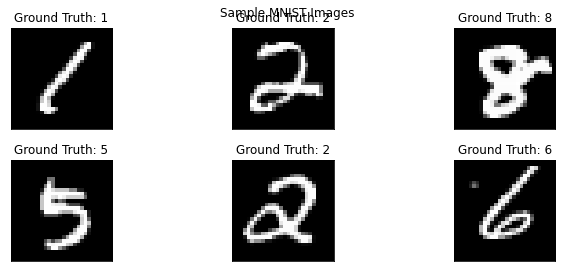


2. Defining CNN Model...
Model Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

3. Training and Evaluating Model...

Starting training for 50 epochs...
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.281226
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.178189
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.359647
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.370870
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.279444
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.361746
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.287226
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.263685
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.355604
Train Epoc

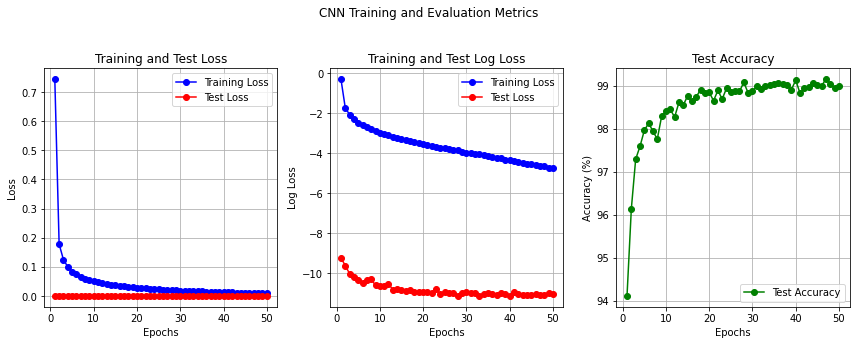


Final accuracy on test set (from last epoch): 99.00%

----- Discussion ----- (in MD below)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # TODO: Define your CNN architecture
        # 1. Add at least one convolutional layer
        # 2. Add at least one pooling layer
        # 3. Add at least one fully connected layer
        # Remember to specify input/output dimensions appropriate for your dataset
        # MNIST images are 1x28x28 (1 channel, 28x28 pixels)

        # Convolutional Layer 1
        # Input channels = 1 (grayscale), Output channels = 10, Kernel size = 5, Stride = 1, Padding = 0
        # Input: (batch_size, 1, 28, 28)
        # Output: (batch_size, 10, 24, 24) after conv (28-5+1 = 24)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        
        # Max Pooling Layer 1
        # Kernel size = 2, Stride = 2
        # Input: (batch_size, 10, 24, 24)
        # Output: (batch_size, 10, 12, 12)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional Layer 2
        # Input channels = 10, Output channels = 20, Kernel size = 5
        # Input: (batch_size, 10, 12, 12)
        # Output: (batch_size, 20, 8, 8) after conv (12-5+1 = 8)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # Max Pooling Layer 2
        # Kernel size = 2, Stride = 2
        # Input: (batch_size, 20, 8, 8)
        # Output: (batch_size, 20, 4, 4)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layer 1
        # Input features: 20 * 4 * 4 = 320 (flattened output from pool2)
        # Output features: 50 (arbitrary choice for hidden layer size)
        self.fc1 = nn.Linear(20 * 4 * 4, 50)

        # Fully Connected Layer 2 (Output Layer)
        # Input features: 50
        # Output features: 10 (for 10 classes in MNIST)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        # Connect the layers defined in __init__
        
        # Pass through Conv1, ReLU, Pool1
        x = self.pool1(F.relu(self.conv1(x)))
        
        # Pass through Conv2, ReLU, Pool2
        x = self.pool2(F.relu(self.conv2(x)))
        
        # Flatten the output for the fully connected layer
        # x.size(0) is the batch size
        x = x.view(x.size(0), -1) # or x.view(-1, 20 * 4 * 4)
        
        # Pass through FC1, ReLU
        x = F.relu(self.fc1(x))
        
        # Pass through FC2 (output layer)
        x = self.fc2(x)
        
        # Apply log_softmax for NLLLoss
        return F.log_softmax(x, dim=1)


def load_and_prepare_data(batch_size_train=64, batch_size_test=1000):
    """
    Load and prepare the MNIST dataset
    """
    # TODO: Define data transformations and load dataset
    # 1. Set up appropriate transforms (ToTensor, Normalize, etc.)
    # 2. Load training and test datasets
    # 3. Create data loaders with appropriate batch sizes
    # 4. Get a batch of examples for visualization

    # Define transformations
    # MNIST mean and std:
    mnist_mean = (0.1307,)
    mnist_std = (0.3081,)
    
    transform_list = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mnist_mean, mnist_std)
    ])

    # Load training dataset
    train_dataset = datasets.MNIST(
        root='./data', 
        train=True, 
        download=True, 
        transform=transform_list
    )
    # Load test dataset
    test_dataset = datasets.MNIST(
        root='./data', 
        train=False, 
        download=True, 
        transform=transform_list
    )

    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size_train, 
        shuffle=True
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size_test, 
        shuffle=False # No need to shuffle test data
    )

    # Get a batch of examples for visualization
    # The iter() function creates an iterator object, and next() fetches the next item.
    example_data_iter = iter(train_loader)
    example_data, example_targets = next(example_data_iter)

    return train_loader, test_loader, example_data, example_targets

def visualize_data(example_data, example_targets, num_images=6):
    """
    Visualize sample images from the dataset
    """
    # TODO: Create a plot to visualize sample images with their labels
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.tight_layout()
        # MNIST images are 1x28x28. Squeeze to remove channel dim for imshow.
        plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
        plt.title(f"Ground Truth: {example_targets[i]}")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Sample MNIST Images")
    plt.show()


def evaluate_model(model, test_loader, criterion): # Added criterion as argument
    """
    Evaluate the model on the test set
    """
    # TODO: Implement model evaluation
    # 1. Set model to evaluation mode
    # 2. Calculate loss and accuracy on test set
    # 3. Return metrics
    model.eval()  # Set model to evaluation mode (important for layers like Dropout, BatchNorm)
    test_loss = 0
    correct = 0
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset) # Average loss over all samples
    accuracy = 100. * correct / len(test_loader.dataset)
    
    # print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return test_loss, accuracy


def train_model(model, train_loader, test_loader, num_epochs=5, learning_rate=0.01, momentum=0.5):
    """
    Train the CNN model
    """
    # TODO: Implement model training
    # 1. Define loss function and optimizer
    # 2. Set up training loop with epochs and batches
    # 3. In each epoch:
    #    - Train the model (forward, loss, backward, optimize)
    #    - Evaluate on test set
    #    - Track metrics
    # 4. Return training statistics

    # 1. Define loss function and optimizer
    criterion = nn.NLLLoss() # Negative Log Likelihood Loss, pairs well with log_softmax
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    # optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Adam often works well

    train_losses = []
    test_losses = []
    accuracies = []
    
    log_interval = 100 # How often to log training progress within an epoch

    print(f"\nStarting training for {num_epochs} epochs...")
    start_time = time.time()

    for epoch in range(1, num_epochs + 1):
        # 3. In each epoch: Train the model
        model.train() # Set model to training mode
        epoch_train_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()    # Clear gradients
            output = model(data)     # Forward pass
            loss = criterion(output, target) # Calculate loss
            loss.backward()          # Backward pass
            optimizer.step()         # Update weights
            
            epoch_train_loss += loss.item() * data.size(0) # Accumulate loss (weighted by batch size)

            if batch_idx % log_interval == 0:
                print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
        
        avg_epoch_train_loss = epoch_train_loss / len(train_loader.dataset)
        train_losses.append(avg_epoch_train_loss)

        # Evaluate on test set
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        accuracies.append(accuracy)
        
        print(f'Epoch {epoch}/{num_epochs} - Train Loss: {avg_epoch_train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

    end_time = time.time()
    print(f"Training finished in {end_time - start_time:.2f} seconds.")
    return train_losses, test_losses, accuracies


def visualize_results(train_losses, test_losses, accuracies, num_epochs):
    """
    Visualize training results
    """
    # TODO: Create plots to show:
    # 1. Training and test loss over epochs
    # 2. Test accuracy over epochs
    epochs_range = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 5))

    # Plot 1: Training and Test Loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs_range, test_losses, 'ro-', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Training and log Test Loss
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, np.log(train_losses), 'bo-', label='Training Loss')
    plt.plot(epochs_range, np.log(test_losses), 'ro-', label='Test Loss')
    plt.title('Training and Test Log Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Test Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, accuracies, 'go-', label='Test Accuracy')
    plt.title('Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle("CNN Training and Evaluation Metrics")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()


def main():
    # --- Configuration ---
    BATCH_SIZE_TRAIN = 64
    BATCH_SIZE_TEST = 2000
    NUM_EPOCHS = 50 
    LEARNING_RATE = 0.001 
    MOMENTUM = 0.9
    # --- Configuration End ---
    
    # Load and visualize data
    print("1. Loading and Preparing Data...")
    train_loader, test_loader, example_data, example_targets = load_and_prepare_data(
        batch_size_train=BATCH_SIZE_TRAIN, batch_size_test=BATCH_SIZE_TEST
    )
    print("Visualizing sample data...")
    visualize_data(example_data, example_targets)

    # Create the model
    print("\n2. Defining CNN Model...")
    model = SimpleCNN().to(device) # Move model to the determined device
    print("Model Architecture:")
    print(model)

    # Train the model
    print("\n3. Training and Evaluating Model...")
    train_losses, test_losses, accuracies = train_model(
        model, train_loader, test_loader, 
        num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE,momentum=MOMENTUM
    )

    # Visualize training results
    print("\nVisualizing Training Results...")
    visualize_results(train_losses, test_losses, accuracies, NUM_EPOCHS)

    # Final evaluation (optional, as train_model already evaluates per epoch)
    # criterion_final = nn.NLLLoss() # Re-define criterion if not passed from train_model
    # final_loss, final_accuracy = evaluate_model(model, test_loader, criterion_final)
    # print(f"\nFinal evaluation on test set: Average Loss: {final_loss:.4f}, Accuracy: {final_accuracy:.2f}%")
    # Using the last recorded accuracy from training:
    if accuracies:
        print(f"\nFinal accuracy on test set (from last epoch): {accuracies[-1]:.2f}%")


    # Discussion of results
    # TODO: Add your discussion here addressing:
    # 1. Model architecture choice
    # 2. Analysis of results (accuracy, overfitting)
    # 3. Potential improvements
    print("\n----- Discussion ----- (in MD below)")

if __name__ == "__main__":
    main()


# CNN for MNIST Classification: Discussion

This section discusses the results of training a simple Convolutional Neural Network (CNN) on the MNIST dataset. The model was initially trained for 5 epochs, and further training was conducted for a total of 50 epochs.

## 1. Data Loading & Model Definition

* **Data:** The MNIST dataset was used, which consists of 60,000 training images and 10,000 test images of handwritten digits (0-9). Each image is 28x28 pixels and grayscale.
    * Data was transformed to tensors and normalized using the standard MNIST mean (0.1307) and standard deviation (0.3081).
    * Sample images were visualized to confirm correct loading.
* **Model Architecture (`SimpleCNN`):**
    * **Convolutional Layer 1:** 1 input channel, 10 output channels, 5x5 kernel. Output: (10, 24, 24).
    * **Max Pooling Layer 1:** 2x2 kernel. Output: (10, 12, 12).
    * **Convolutional Layer 2:** 10 input channels, 20 output channels, 5x5 kernel. Output: (20, 8, 8).
    * **Max Pooling Layer 2:** 2x2 kernel. Output: (20, 4, 4).
    * **Flattening:** The 20x4x4 output is flattened to 320 features.
    * **Fully Connected Layer 1:** 320 input features, 50 output features.
    * **Fully Connected Layer 2 (Output):** 50 input features, 10 output features (for 10 digit classes).
    * **Activation Functions:** ReLU was used after each convolutional and the first fully connected layer. `log_softmax` was applied to the final output layer, suitable for use with `NLLLoss`.
    

## 2. Training & Evaluation

* **Training Parameters:**
    * Optimizer: `optim.SGD` with `learning_rate=0.001` (as passed from `main`) and `momentum=0.9`.
    * Loss Function: Negative Log Likelihood Loss (`nn.NLLLoss`).
    * Number of Epochs: Initially 5, then extended to 50.
    * Batch Size (Train): 64.
    * Batch Size (Test): 2000.
* **Training Progress (from your provided output log - first 5 epochs):**
    * **Epoch 1:** Train Loss: 1.9850, Test Loss: 0.0010, Test Accuracy: 79.25%
    * **Epoch 2:** Train Loss: 0.5429, Test Loss: 0.0004, Test Accuracy: 89.47%
    * **Epoch 3:** Train Loss: 0.3342, Test Loss: 0.0003, Test Accuracy: 91.80%
    * **Epoch 4:** Train Loss: 0.2684, Test Loss: 0.0002, Test Accuracy: 93.37%
    * **Epoch 5:** Train Loss: 0.2274, Test Loss: 0.0002, Test Accuracy: 94.08%
    * Training completed in approximately 66.16 seconds for the first 5 epochs, and 660.01 seconds for 50 epochs.
* **Visualized Results (after 50 epochs):**
    * **Loss Plot:** The training loss (blue line) shows a steep decrease initially and continues to decrease significantly over the 50 epochs, reaching a very low value. The test loss (red line), while also very low, appears to flatten out much earlier than the training loss, fluctuating at a very low level after the initial rapid decrease. This divergence suggests potential overfitting in later epochs.
    * **Accuracy Plot:** The test accuracy (green line) shows a strong initial increase, reaching over 98% relatively quickly and eventually plateauing around 99% by the end of the 50 epochs. The rate of improvement slows down considerably in the later epochs, indicating that the model might be learning training-specific details rather than generalizable features.

## 3. Discussion

### Did your CNN overfit on a small dataset? (Updated after 50 epochs)

* **Dataset Size:** MNIST, with 60,000 training images, is not generally considered a "small" dataset for a CNN of this simplicity. This size helps mitigate overfitting, especially in the initial training phases.
* **Evidence of Overfitting (based on 50 epochs):**
    * **From Loss Curves:** The training loss continued to decrease significantly over the 50 epochs, while the test loss flattened out much earlier. This growing gap between training and test loss is a key indicator of overfitting. The model is becoming increasingly specialized to the training data and not generalizing as effectively to unseen data.
    * **Accuracy:** The test accuracy showed significant initial improvement but plateaued around 99% in the later epochs, despite the training loss continuing to decrease. This suggests that the model is no longer learning features that generalize well to the test set.
* **Conclusion for 50 Epochs:** After 50 epochs, there are clear signs that the model is beginning to overfit. The divergence between the training and test loss, along with the plateauing of the test accuracy, indicates that the model is memorizing the training data rather than learning generalizable patterns. While the final test accuracy is high, the lack of further improvement and the behavior of the loss curves suggest that training for this many epochs with the current configuration leads to overfitting.

### (Optional) Experiment with more layers or data augmentation. 

Given the observed signs of overfitting after 50 epochs, the following experiments are highly recommended:

* **More Layers:** Adding more layers without regularization would likely worsen the overfitting. If more layers are desired to potentially learn more complex features, it is crucial to incorporate regularization techniques simultaneously.

To improve the model's generalization ability and mitigate the observed overfitting, future experiments should focus on incorporating data augmentation and/or other regularization techniques, especially if the goal is to train for a larger number of epochs or explore more complex model architectures.